In [724]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, recall_score
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors
from sklearn.preprocessing import Binarizer
import matplotlib.pyplot as plt

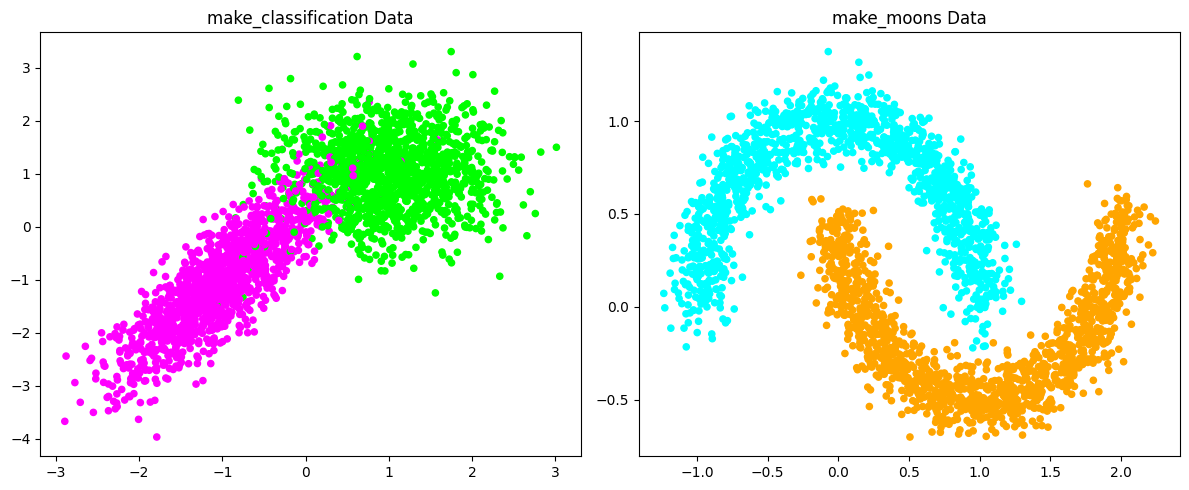

In [725]:
random_state=254493
n_samples = 2593

X_clf, y_clf = make_classification(random_state=random_state, n_samples=n_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

X_moons, y_moons = make_moons(random_state=random_state, n_samples=n_samples, noise=0.1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=np.where(y_clf==0, 'lime', 'magenta'), s=20)
plt.title('make_classification Data')

plt.subplot(1, 2, 2)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=np.where(y_moons==0, 'cyan', 'orange'), s=20)
plt.title('make_moons Data')

plt.tight_layout()
plt.show()

In [726]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=random_state)
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size=0.2, random_state=random_state)

In [727]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

In [728]:
def Heviside(x):
    return np.where(x >= 0, 1, 0)

def Heviside_derivative(x):
    return 1

In [729]:
def tanh_derivative(x):
    return (1 / np.cosh(x))**2

In [730]:
def sgn(x):
    return np.sign(x)

def sgn_derivative(x):
    return 1

In [731]:
def relu(x):
    return x * (x > 0)

def relu_derivative(x):
    return Heviside(x)

In [732]:
def leaky_relu(x):
    return np.where(x > 0, x, 0.01 * x)

def leaky_relu_derivative(x):
    return np.where(x > 0, 1, 0.01)


In [736]:
def neuron(X, t, function, derivative, eta = 0.1, iterations = 10, b = 0.1):
    n_samples, n_features = X.shape
    # w = [0.1, 0.1, b]
    # X = np.c_[X, np.ones(n_samples)]

    w = [0.1, 0.1]
    # X = np.c_[X, np.ones(n_samples)]

    for _ in range(iterations):
        for j in range(n_samples):
            s = np.dot(X[j], w)
            y = function(s)
            error = t[j] - y
            gradient = -eta * error * derivative(s) * X[j]
            w -= gradient
    
    return w


In [734]:
# def neuron(X, t, function, derivative, eta = 0.1, iterations = 100, b = 0.1):
#     n_samples, n_features = X.shape
#     w = [0.1, 0.1]

#     for _ in range(iterations):
#         for j in range(n_samples):
#             s = np.dot(X[j], w)
#             y = function(s + b)
#             error = t[j] - y
#             gradient = -eta * error * derivative(s+b) * X[j]
#             w -= gradient
#             b -= -eta * error * derivative(b)
    
#     return w


Logistic

In [737]:
weights_sigmoid_clf = neuron(X_train_clf, y_train_clf, sigmoid, sigmoid_derivative)
y_pred_sigmoid_clf = sigmoid(np.dot(X_test_clf, weights_sigmoid_clf)) > 0.5
accuracy_sigmoid_clf = accuracy_score(y_test_clf, y_pred_sigmoid_clf)
print("Accuracy:", accuracy_sigmoid_clf)

Accuracy: 0.9672447013487476


In [738]:
weights_sigmoid_moons = neuron(X_train_moons, y_train_moons, sigmoid, sigmoid_derivative)
y_pred_sigmoid_moons = sigmoid(np.dot(X_test_moons, weights_sigmoid_moons)) > 0.5
accuracy_sigmoid_moons = accuracy_score(y_test_moons, y_pred_sigmoid_moons)
print("Accuracy:", accuracy_sigmoid_moons)

Accuracy: 0.882466281310212


Heviside

In [739]:
weights_Heviside_clf = neuron(X_train_clf, y_train_clf, Heviside, Heviside_derivative)
y_pred_Heviside_clf = Heviside(np.dot(X_test_clf, weights_Heviside_clf))
accuracy_Heviside_clf = accuracy_score(y_test_clf, y_pred_Heviside_clf)
print("Accuracy:", accuracy_Heviside_clf)

Accuracy: 0.9441233140655106


In [740]:
weights_Heviside_moons= neuron(X_train_moons, y_train_moons, Heviside, Heviside_derivative)
y_pred_Heviside_moons = Heviside(np.dot(X_test_moons, weights_Heviside_moons))
accuracy_Heviside_moons = accuracy_score(y_test_moons, y_pred_Heviside_moons)
print("Accuracy:", accuracy_Heviside_moons)

Accuracy: 0.8805394990366089


Sinus

In [741]:
y_train_clf_changed_label = [-1 if value == 0 else 1 for value in y_train_clf]
y_train_moons_changed_label = [-1 if value == 0 else 1 for value in y_train_moons]

In [742]:
weights_sin_clf = neuron(X_train_clf, y_train_clf_changed_label, np.sin, np.cos)
y_pred_sin_clf = np.sin(np.dot(X_test_clf, weights_sin_clf)) > 0
accuracy_sin_clf = accuracy_score(y_test_clf, y_pred_sin_clf)
print("Accuracy:", accuracy_sin_clf)

Accuracy: 0.9518304431599229


In [743]:
weights_sin_moons = neuron(X_train_moons, y_train_moons_changed_label, np.sin, np.cos)
y_pred_sin_moons = np.sin(np.dot(X_test_moons, weights_sin_moons)) > 0
accuracy_sin_moons = accuracy_score(y_test_moons, y_pred_sin_moons)
print("Accuracy:", accuracy_sin_moons)

Accuracy: 0.8747591522157996


Tanh

In [744]:
weights_tanh_clf = neuron(X_train_clf, y_train_clf_changed_label, np.tanh, tanh_derivative)
y_pred_tanh_clf = np.tanh(np.dot(X_test_clf, weights_tanh_clf)) > 0
accuracy_tanh_clf = accuracy_score(y_test_clf, y_pred_tanh_clf)
print("Accuracy:", accuracy_tanh_clf)

Accuracy: 0.9633911368015414


In [745]:
weights_tanh_moons = neuron(X_train_moons, y_train_moons_changed_label, np.tanh, tanh_derivative)
y_pred_tanh_moons = np.tanh(np.dot(X_test_moons, weights_tanh_moons)) > 0
accuracy_tanh_moons = accuracy_score(y_test_moons, y_pred_tanh_moons)
print("Accuracy:", accuracy_tanh_moons)

Accuracy: 0.8728323699421965


Signum

In [746]:
weights_sgn_clf = neuron(X_train_clf, y_train_clf_changed_label, sgn, sgn_derivative)
y_pred_sgn_clf = np.sign(np.dot(X_test_clf, weights_sgn_clf)) > 0
accuracy_sgn_clf = accuracy_score(y_test_clf, y_pred_sgn_clf)
print("Accuracy:", accuracy_sgn_clf)

Accuracy: 0.9653179190751445


In [747]:
weights_sgn_moons = neuron(X_train_moons, y_train_moons_changed_label, sgn, sgn_derivative)
y_pred_sgn_moons = np.sign(np.dot(X_test_moons, weights_sgn_moons)) > 0
accuracy_sgn_moons = accuracy_score(y_test_moons, y_pred_sgn_moons)
print("Accuracy:", accuracy_sgn_moons)

Accuracy: 0.7591522157996147


ReLU

In [748]:
weights_relu_clf = neuron(X_train_clf, y_train_clf, relu, relu_derivative)
y_pred_relu_clf = relu(np.dot(X_test_clf, weights_relu_clf)) > 0
accuracy_relu_clf = accuracy_score(y_test_clf, y_pred_relu_clf)
print("Accuracy:", accuracy_relu_clf)

Accuracy: 0.9421965317919075


In [749]:
weights_relu_moons = neuron(X_train_moons, y_train_moons, relu, relu_derivative)
y_pred_relu_moons = relu(np.dot(X_test_moons, weights_relu_moons)) > 0
accuracy_relu_moons = accuracy_score(y_test_moons, y_pred_relu_moons)
print("Accuracy:", accuracy_relu_moons)

Accuracy: 0.8728323699421965


Leaky ReLU

In [750]:
weights_leaky_relu_clf = neuron(X_train_clf, y_train_clf, leaky_relu, leaky_relu_derivative)
y_pred_leaky_relu_clf = (leaky_relu(np.dot(X_test_clf, weights_leaky_relu_clf)) >=0).astype(int)
accuracy_leaky_relu_clf = accuracy_score(y_test_clf, y_pred_leaky_relu_clf)
print("Accuracy:", accuracy_leaky_relu_clf)

Accuracy: 0.9421965317919075


In [751]:
weights_leaky_relu_moons = neuron(X_train_moons, y_train_moons, leaky_relu, leaky_relu_derivative)
y_pred_leaky_relu_moons = (leaky_relu(np.dot(X_test_moons, weights_leaky_relu_moons)) >= 0).astype(int)
accuracy_leaky_relu_moons = accuracy_score(y_test_moons, y_pred_leaky_relu_moons)
print("Accuracy:", accuracy_leaky_relu_moons)

Accuracy: 0.8728323699421965


In [752]:
def plot_decision_boundary(ax, X_test, y_test, weights, colours, title, function, treshold = 0, resolution=0.02):
    val = 0.1 if function != np.sin else 2
    x_min, x_max = X_test[:, 0].min() - val, X_test[:, 0].max() + val
    y_min, y_max = X_test[:, 1].min() - val, X_test[:, 1].max() + val
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    Z = function(np.dot(np.c_[xx.ravel(), yy.ravel()], weights)) > treshold
    Z = Z.reshape(xx.shape)

    cmap = mcolors.ListedColormap(colours)
    ax.contourf(xx, yy, Z, alpha=0.2, cmap=cmap, levels=[-1, 0, 1])

    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap, s = 40)

    
    ax.set_title(title)

def plot_confusion_matrix_with_metrics(ax, y_true, y_pred, model):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = recall_score(y_true, y_pred)
    specificity = recall_score(y_true, y_pred, pos_label=0)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f"Confusion matrix for {model} as activaction function")
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    
    textstr = '\n'.join((
        f'Accuracy: {accuracy:.2f}',
        f'Sensitivity: {sensitivity:.2f}',
        f'Specificity: {specificity:.2f}'
    ))
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    ax.text(0.95, 0.05, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='bottom', horizontalalignment='right', bbox=props)

def plot_roc_curve(ax, y_true, y_scores, line_color, fill_color, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    ax.plot(fpr, tpr, color=line_color, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    ax.fill_between(fpr, tpr, color=fill_color, alpha=0.2)
    
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend(loc='lower right')

In [753]:
def plot_summary(axs, X_tests, y_tests, weightss, colourss, function,  y_preds, model, treshold):        
        for j in range(2):
            y_scores = function(np.dot(X_tests[j], weightss[j]))
            plot_decision_boundary(axs[0, j], X_tests[j], y_tests[j], weightss[j], colourss[j], f"Decision boundary for {model} activation", function, treshold)
            plot_confusion_matrix_with_metrics(axs[1, j], y_tests[j], y_preds[j], model)
            plot_roc_curve(axs[2,j], y_tests[j], y_scores, colourss[j][0], colourss[j][1], f"ROC for {model} activation")   

logistic  --->  [array([-3.44691213, -1.33185469]), array([ 1.06970058, -4.29573971])]
Heaviside  --->  [array([-0.20615604,  0.00357655]), array([ 0.0677498 , -0.21217908])]
sinus  --->  [array([-0.80980645, -0.07005489]), array([ 0.45328435, -1.88706947])]
tanh  --->  [array([-1.96422628, -0.60903082]), array([ 0.54883787, -2.45723783])]
sign  --->  [array([-0.40621095, -0.19803796]), array([-0.01975259, -0.489694  ])]
ReLU  --->  [array([-0.83477759,  0.07937392]), array([ 0.46608906, -1.0359321 ])]
leaky ReLU  --->  [array([-0.8354232,  0.0799041]), array([ 0.46654864, -1.03222801])]


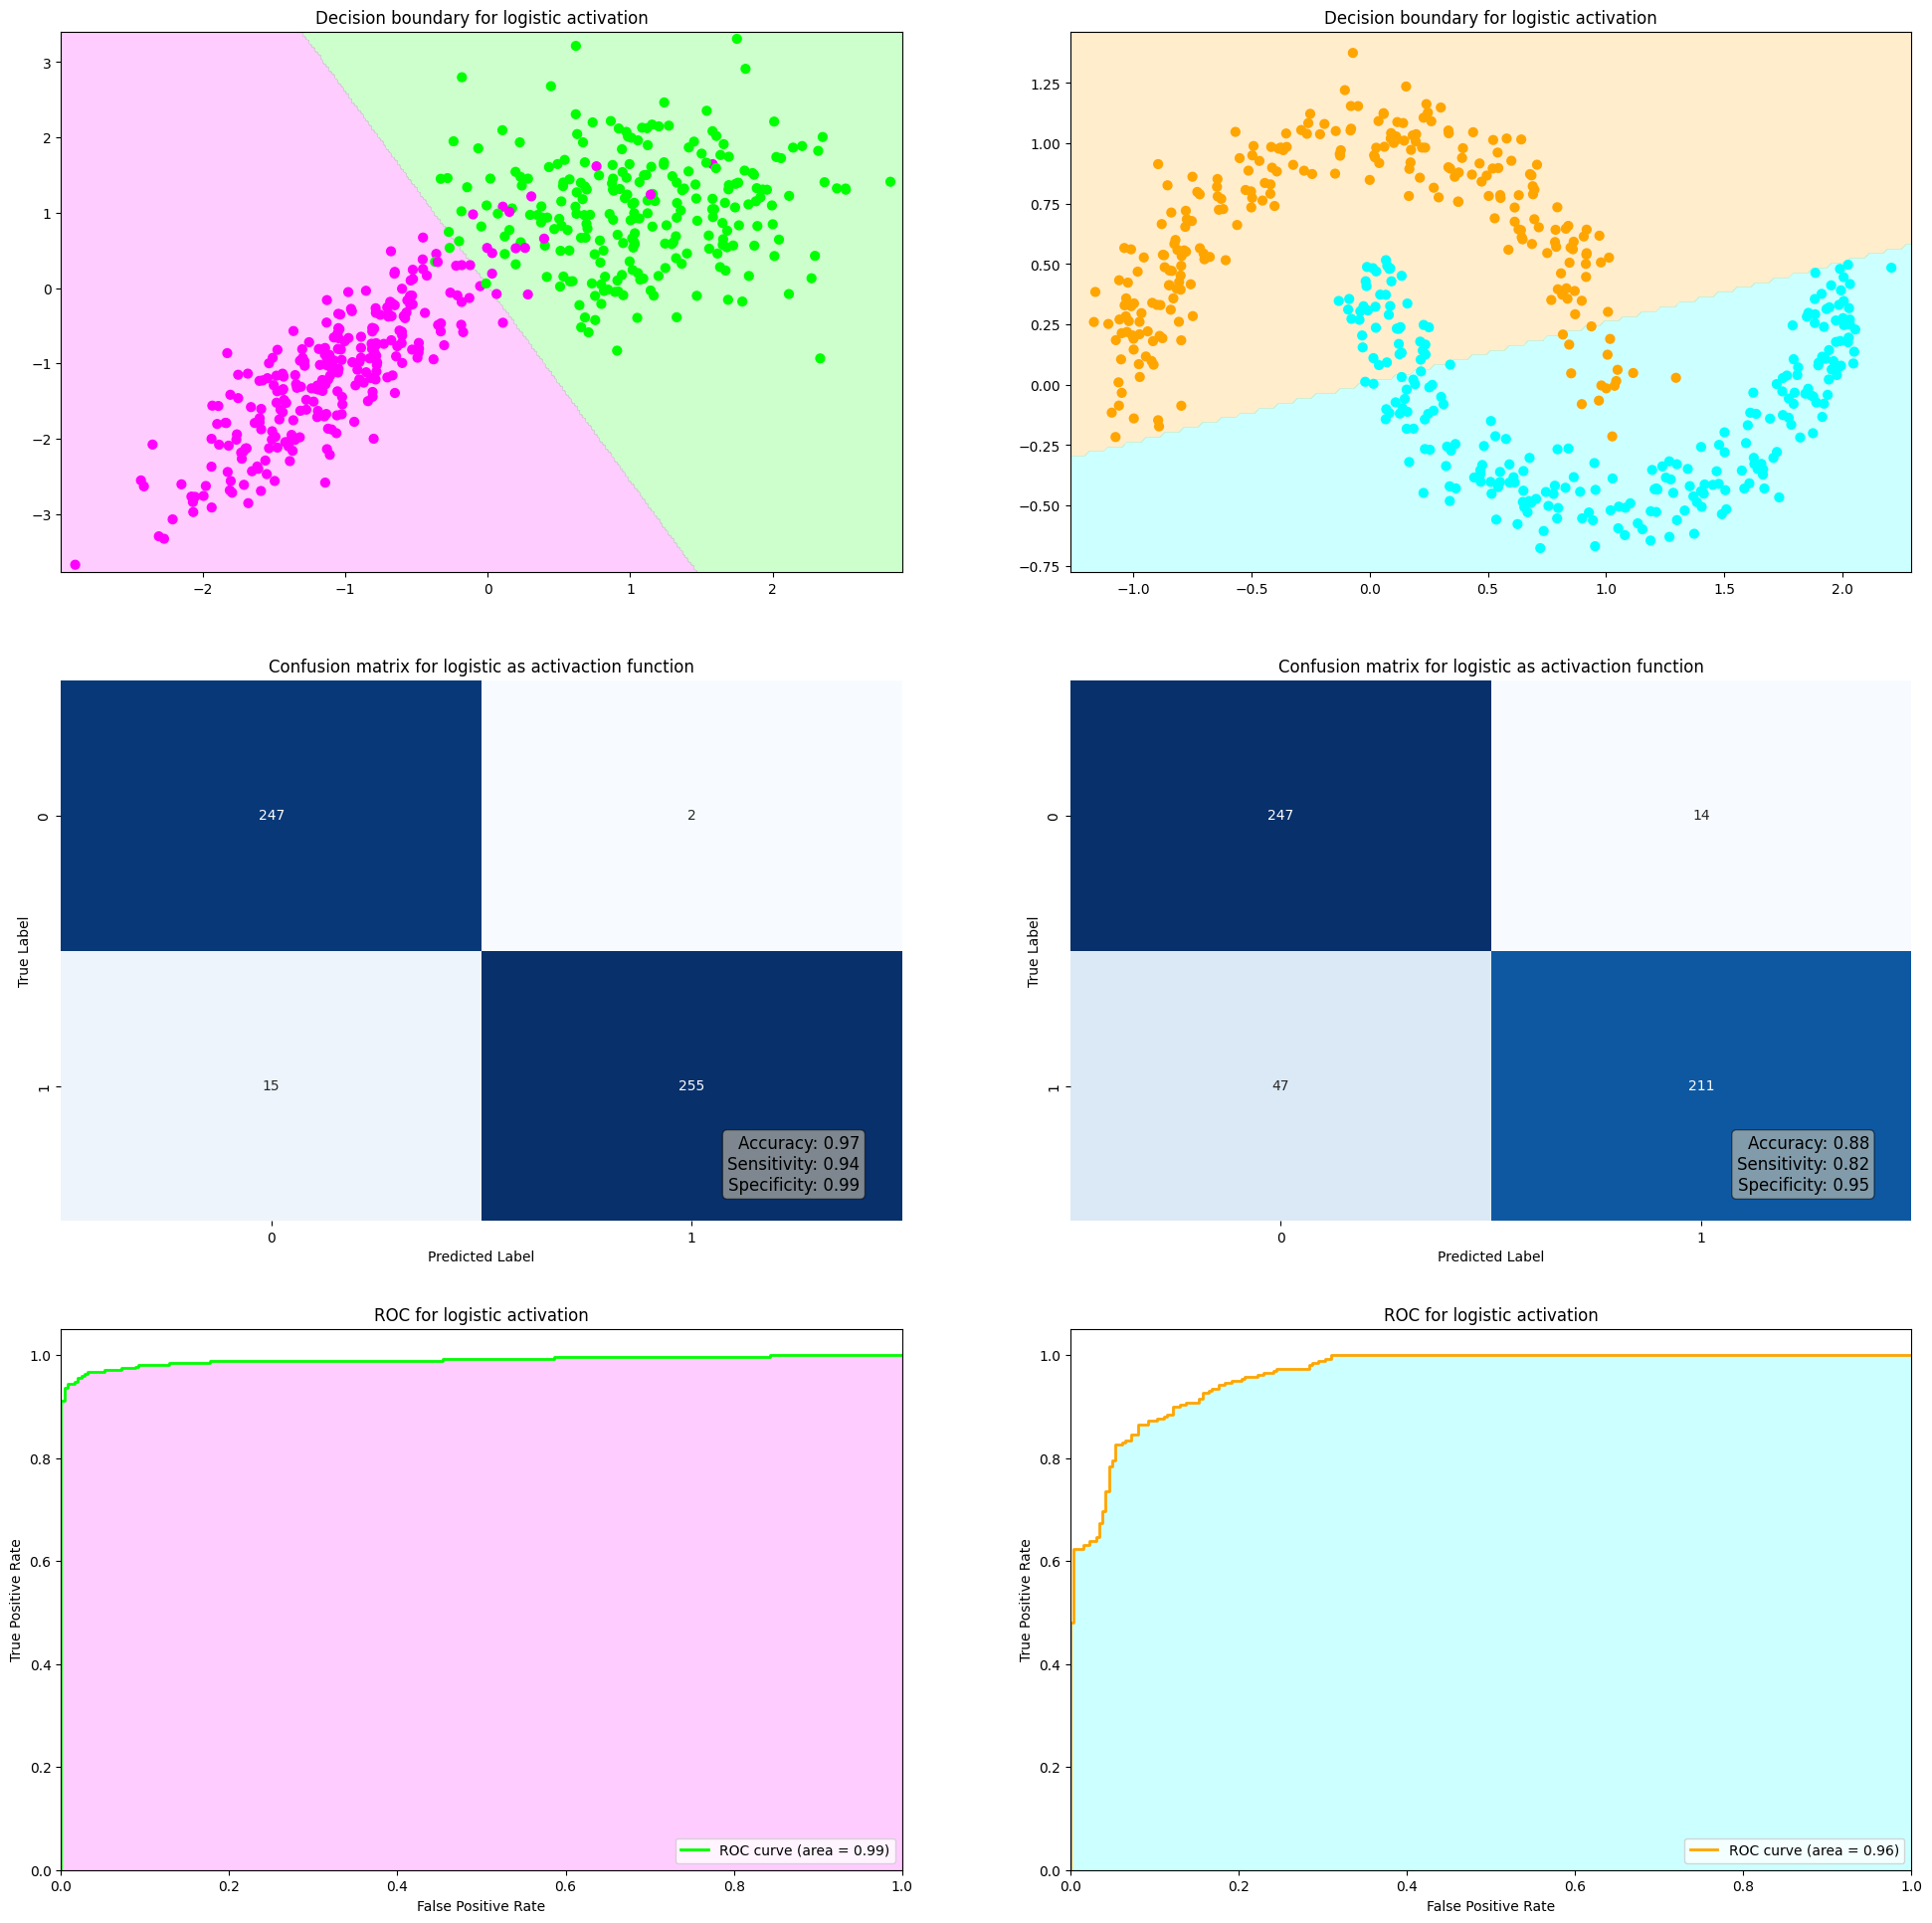

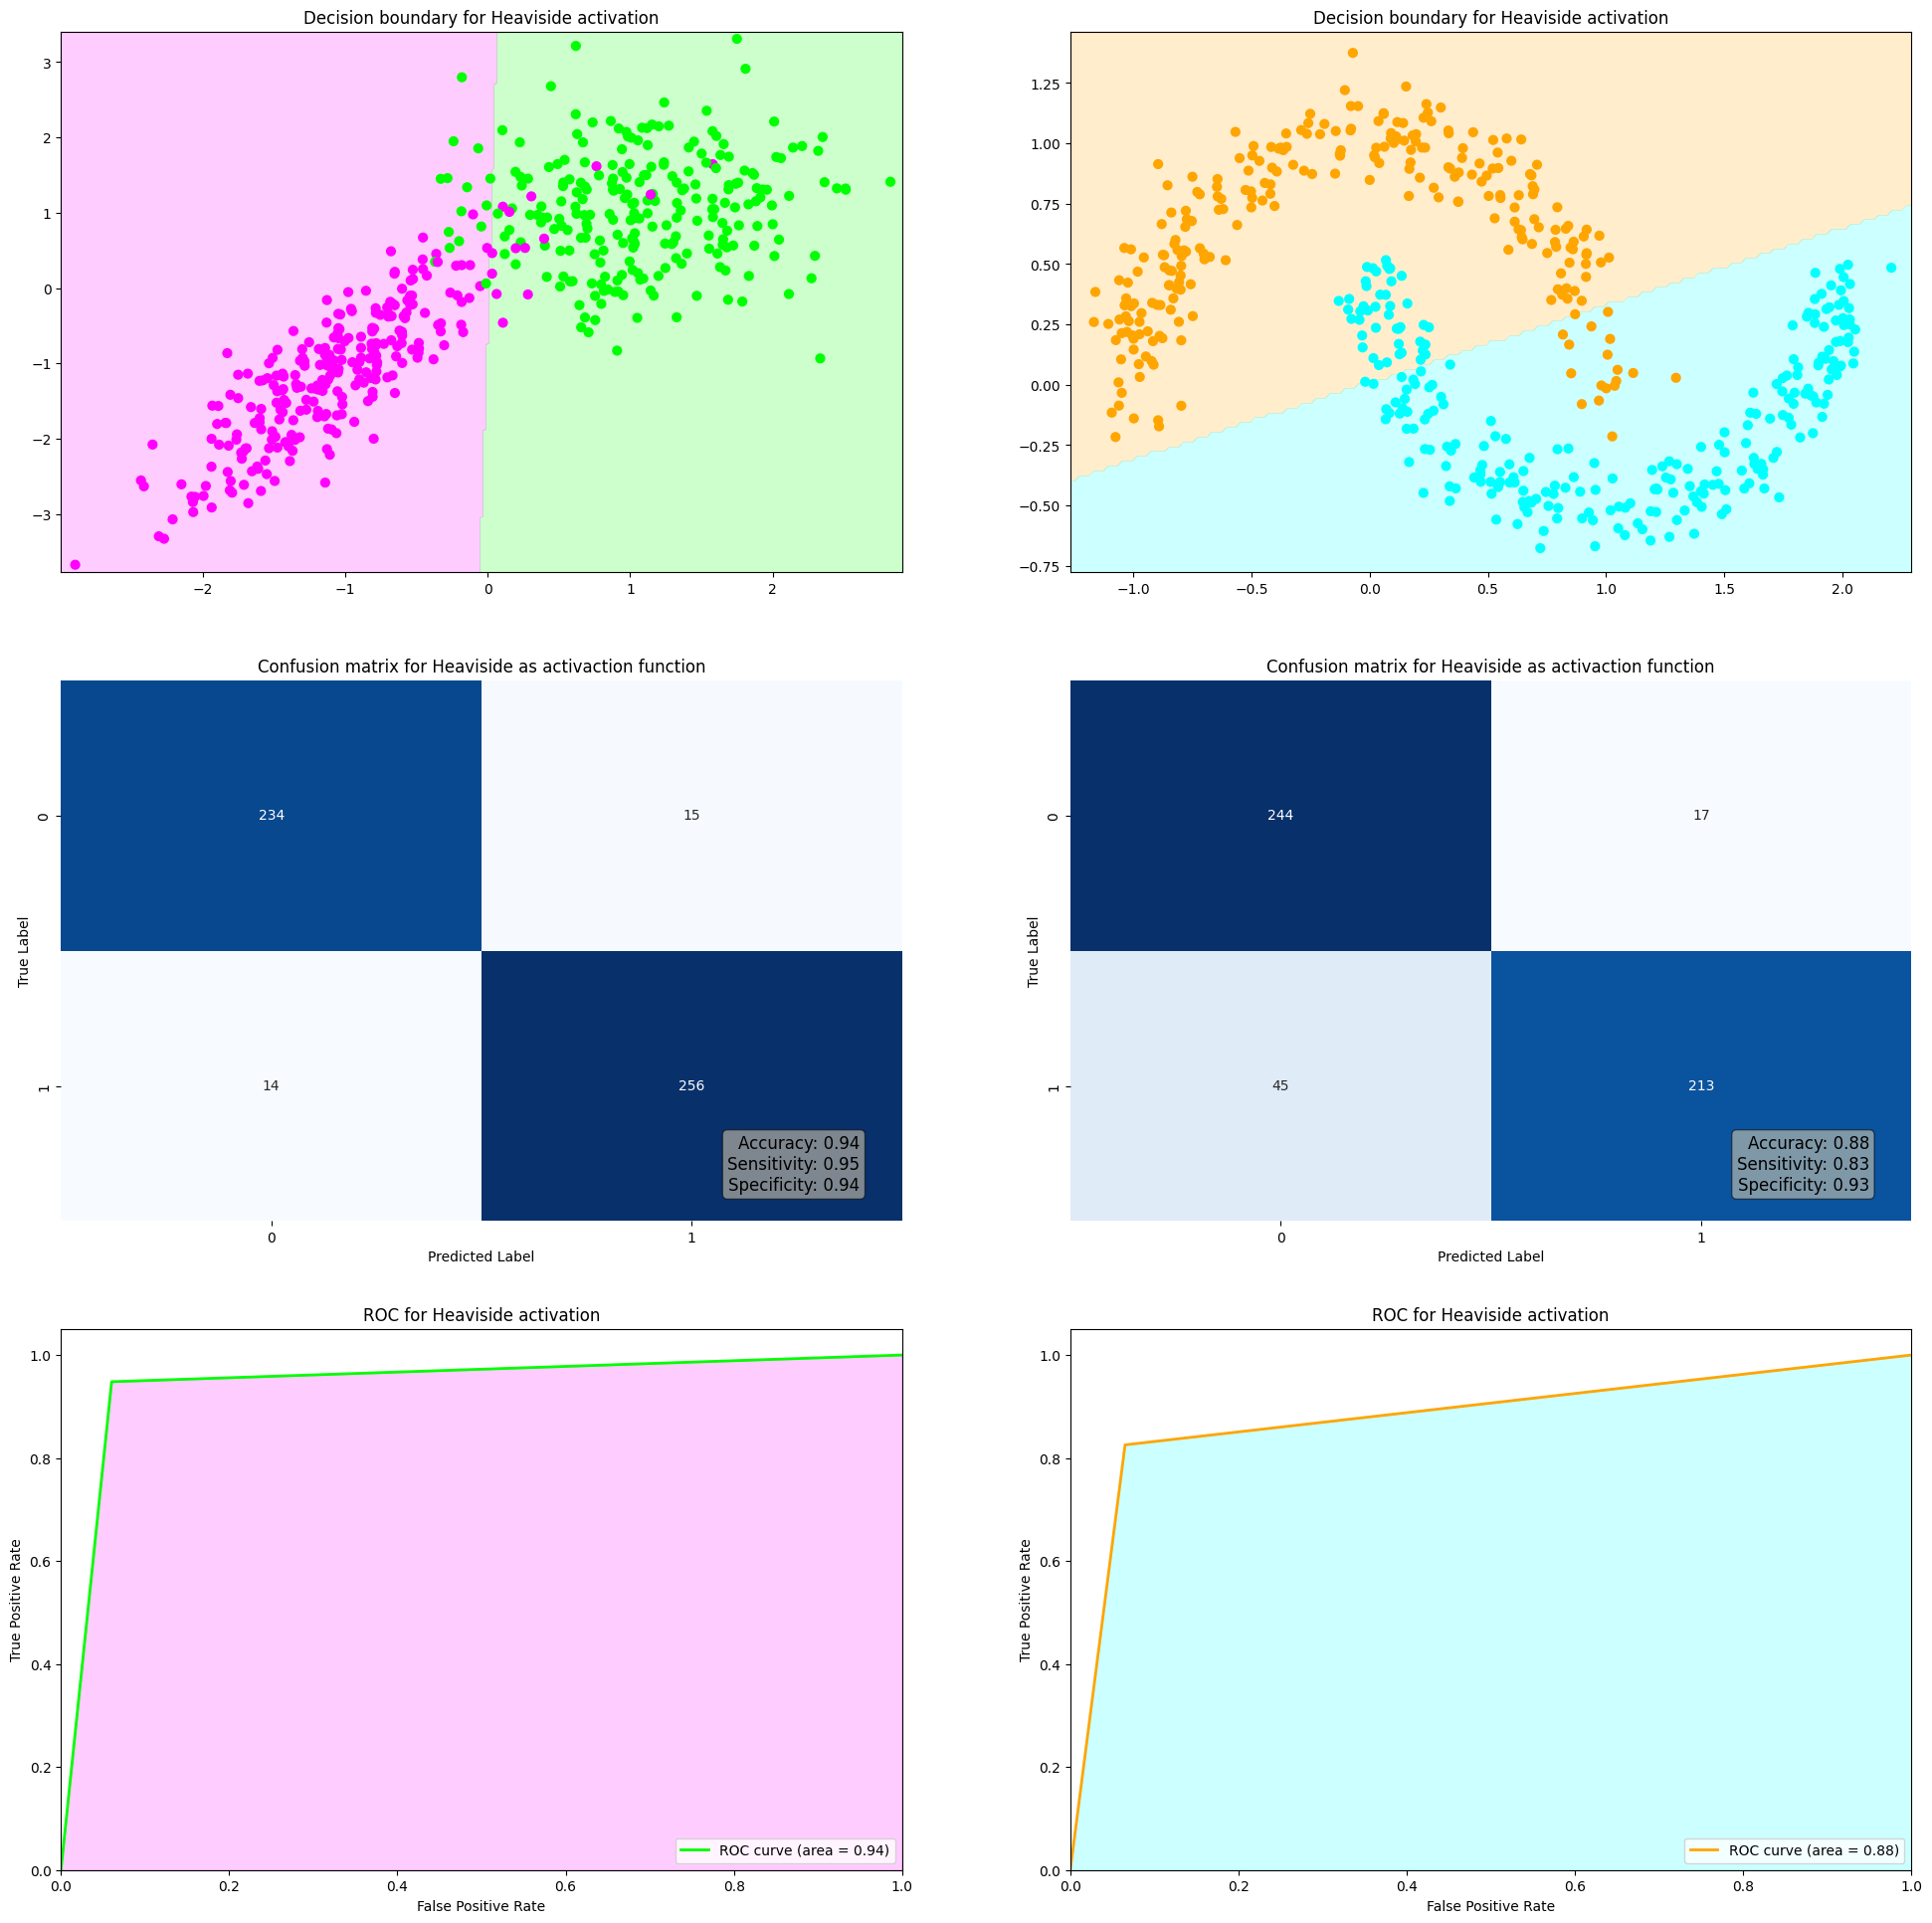

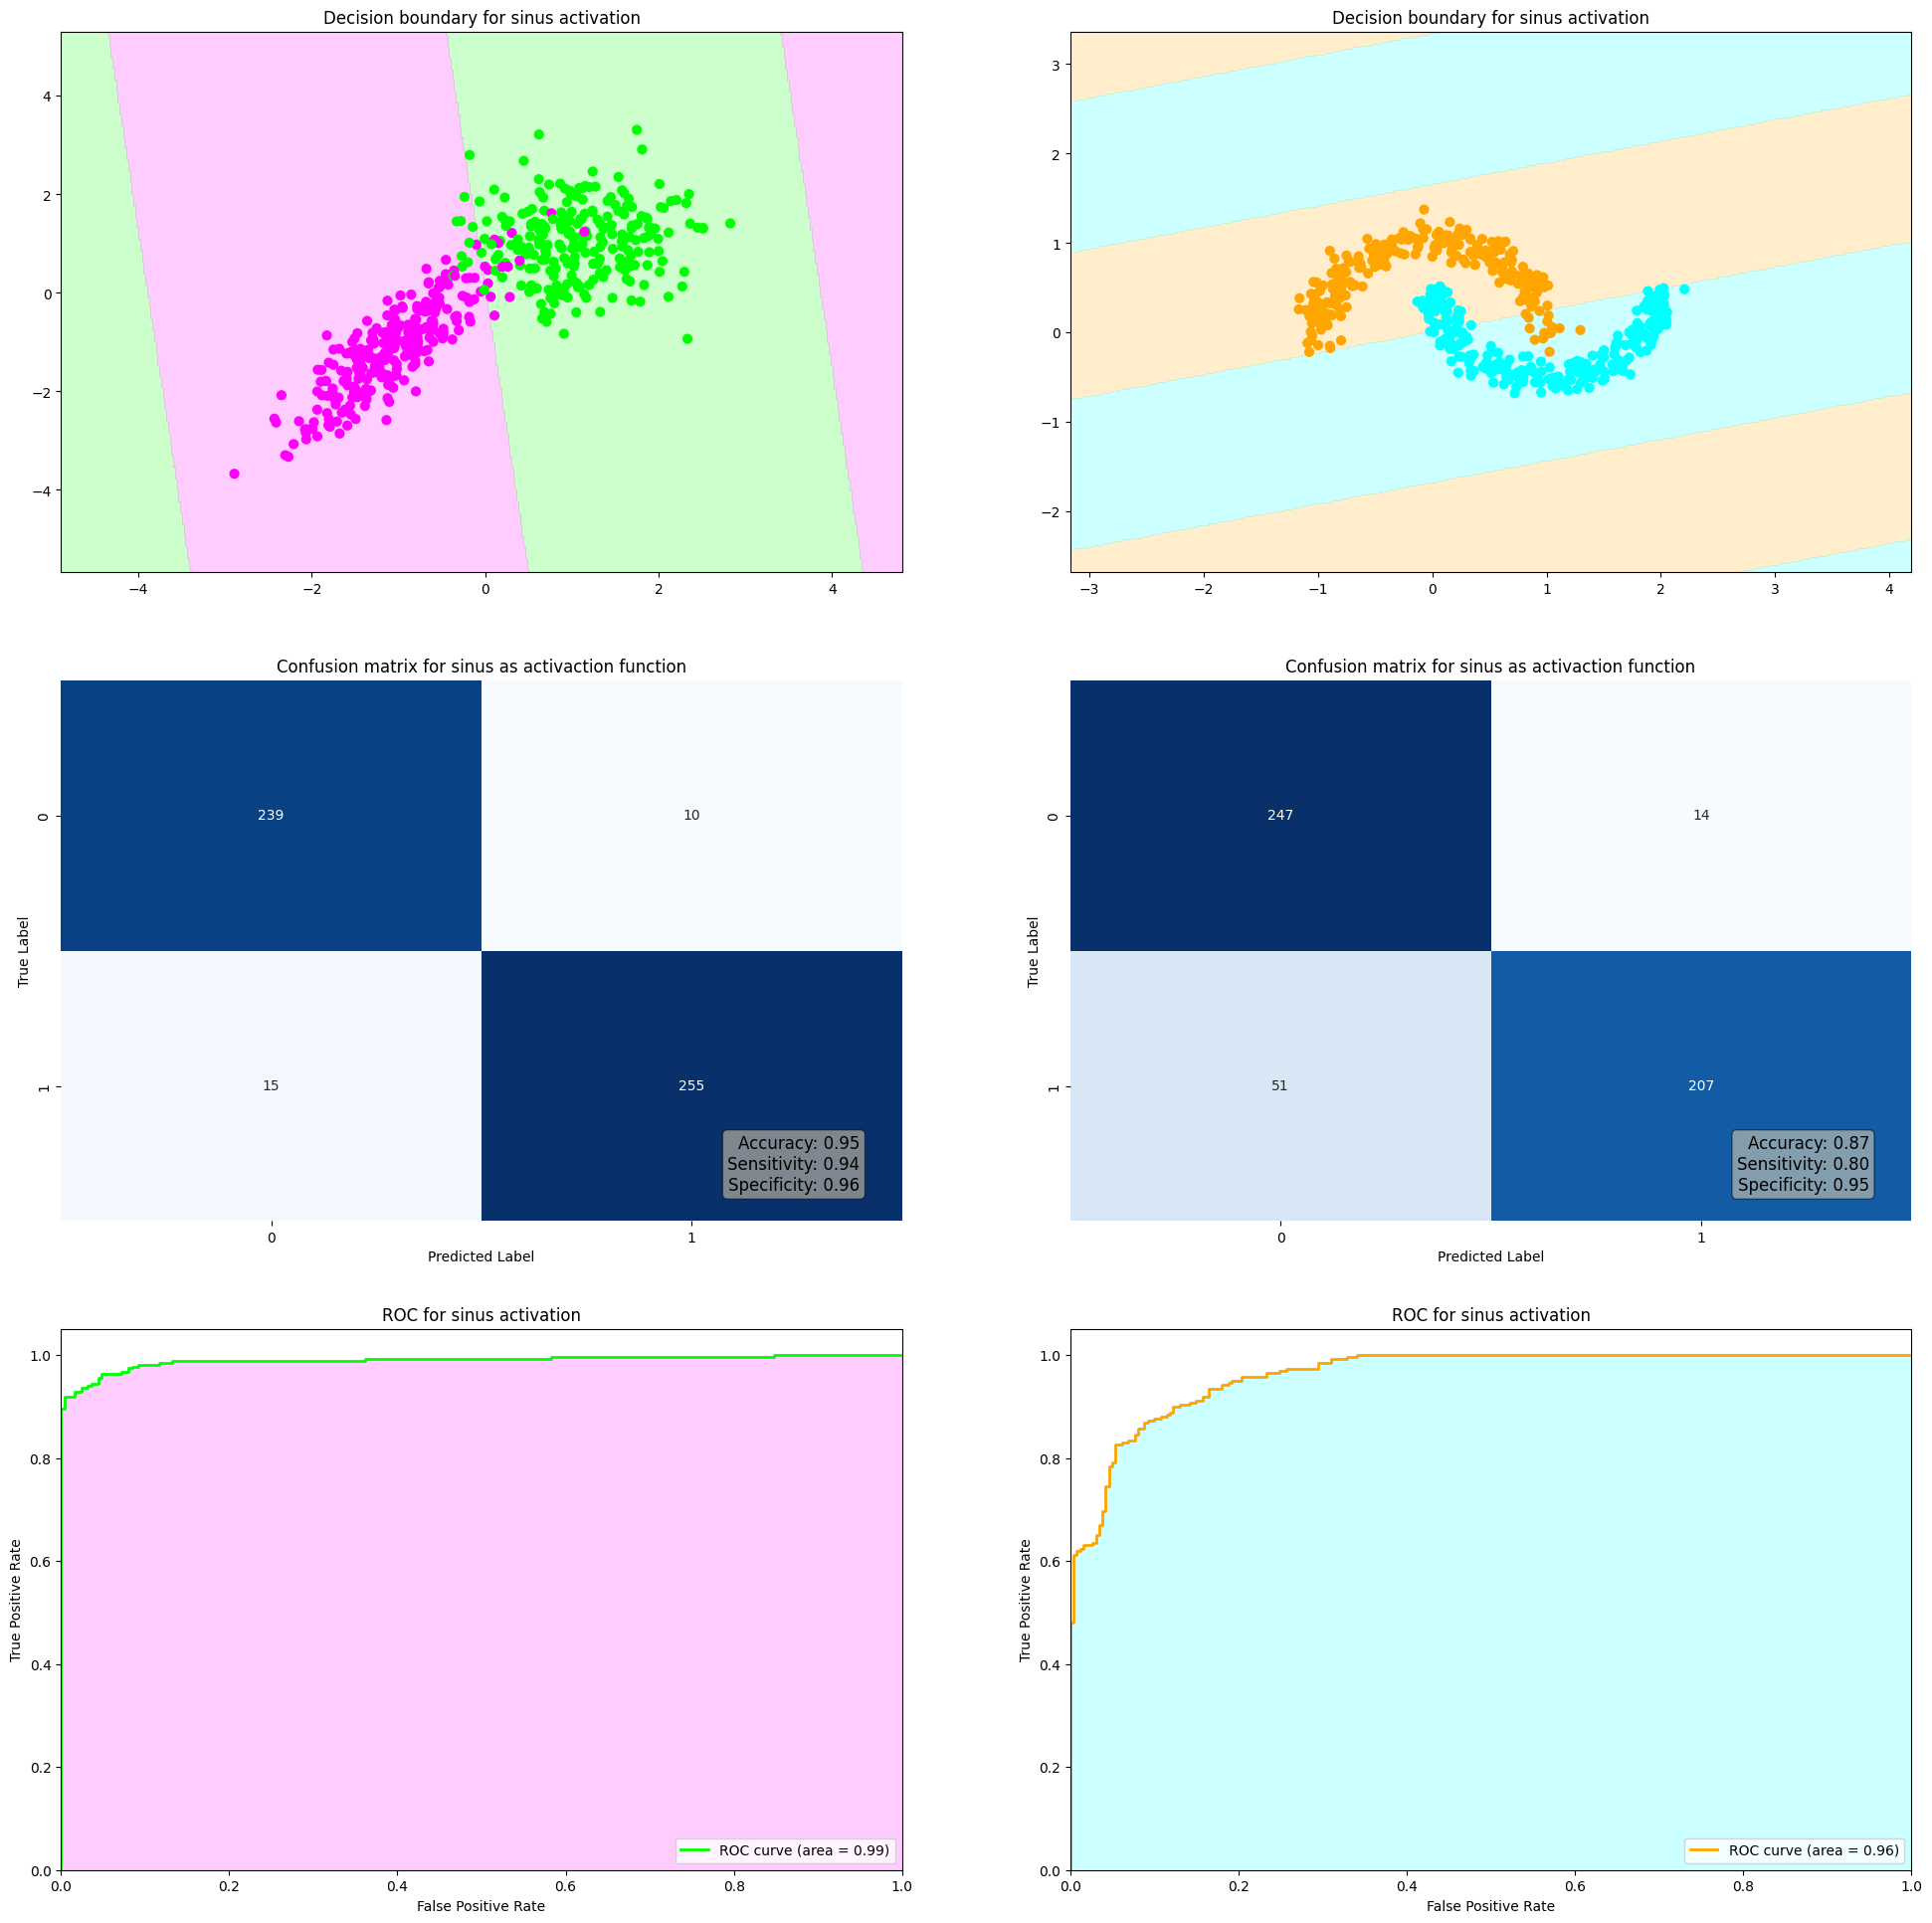

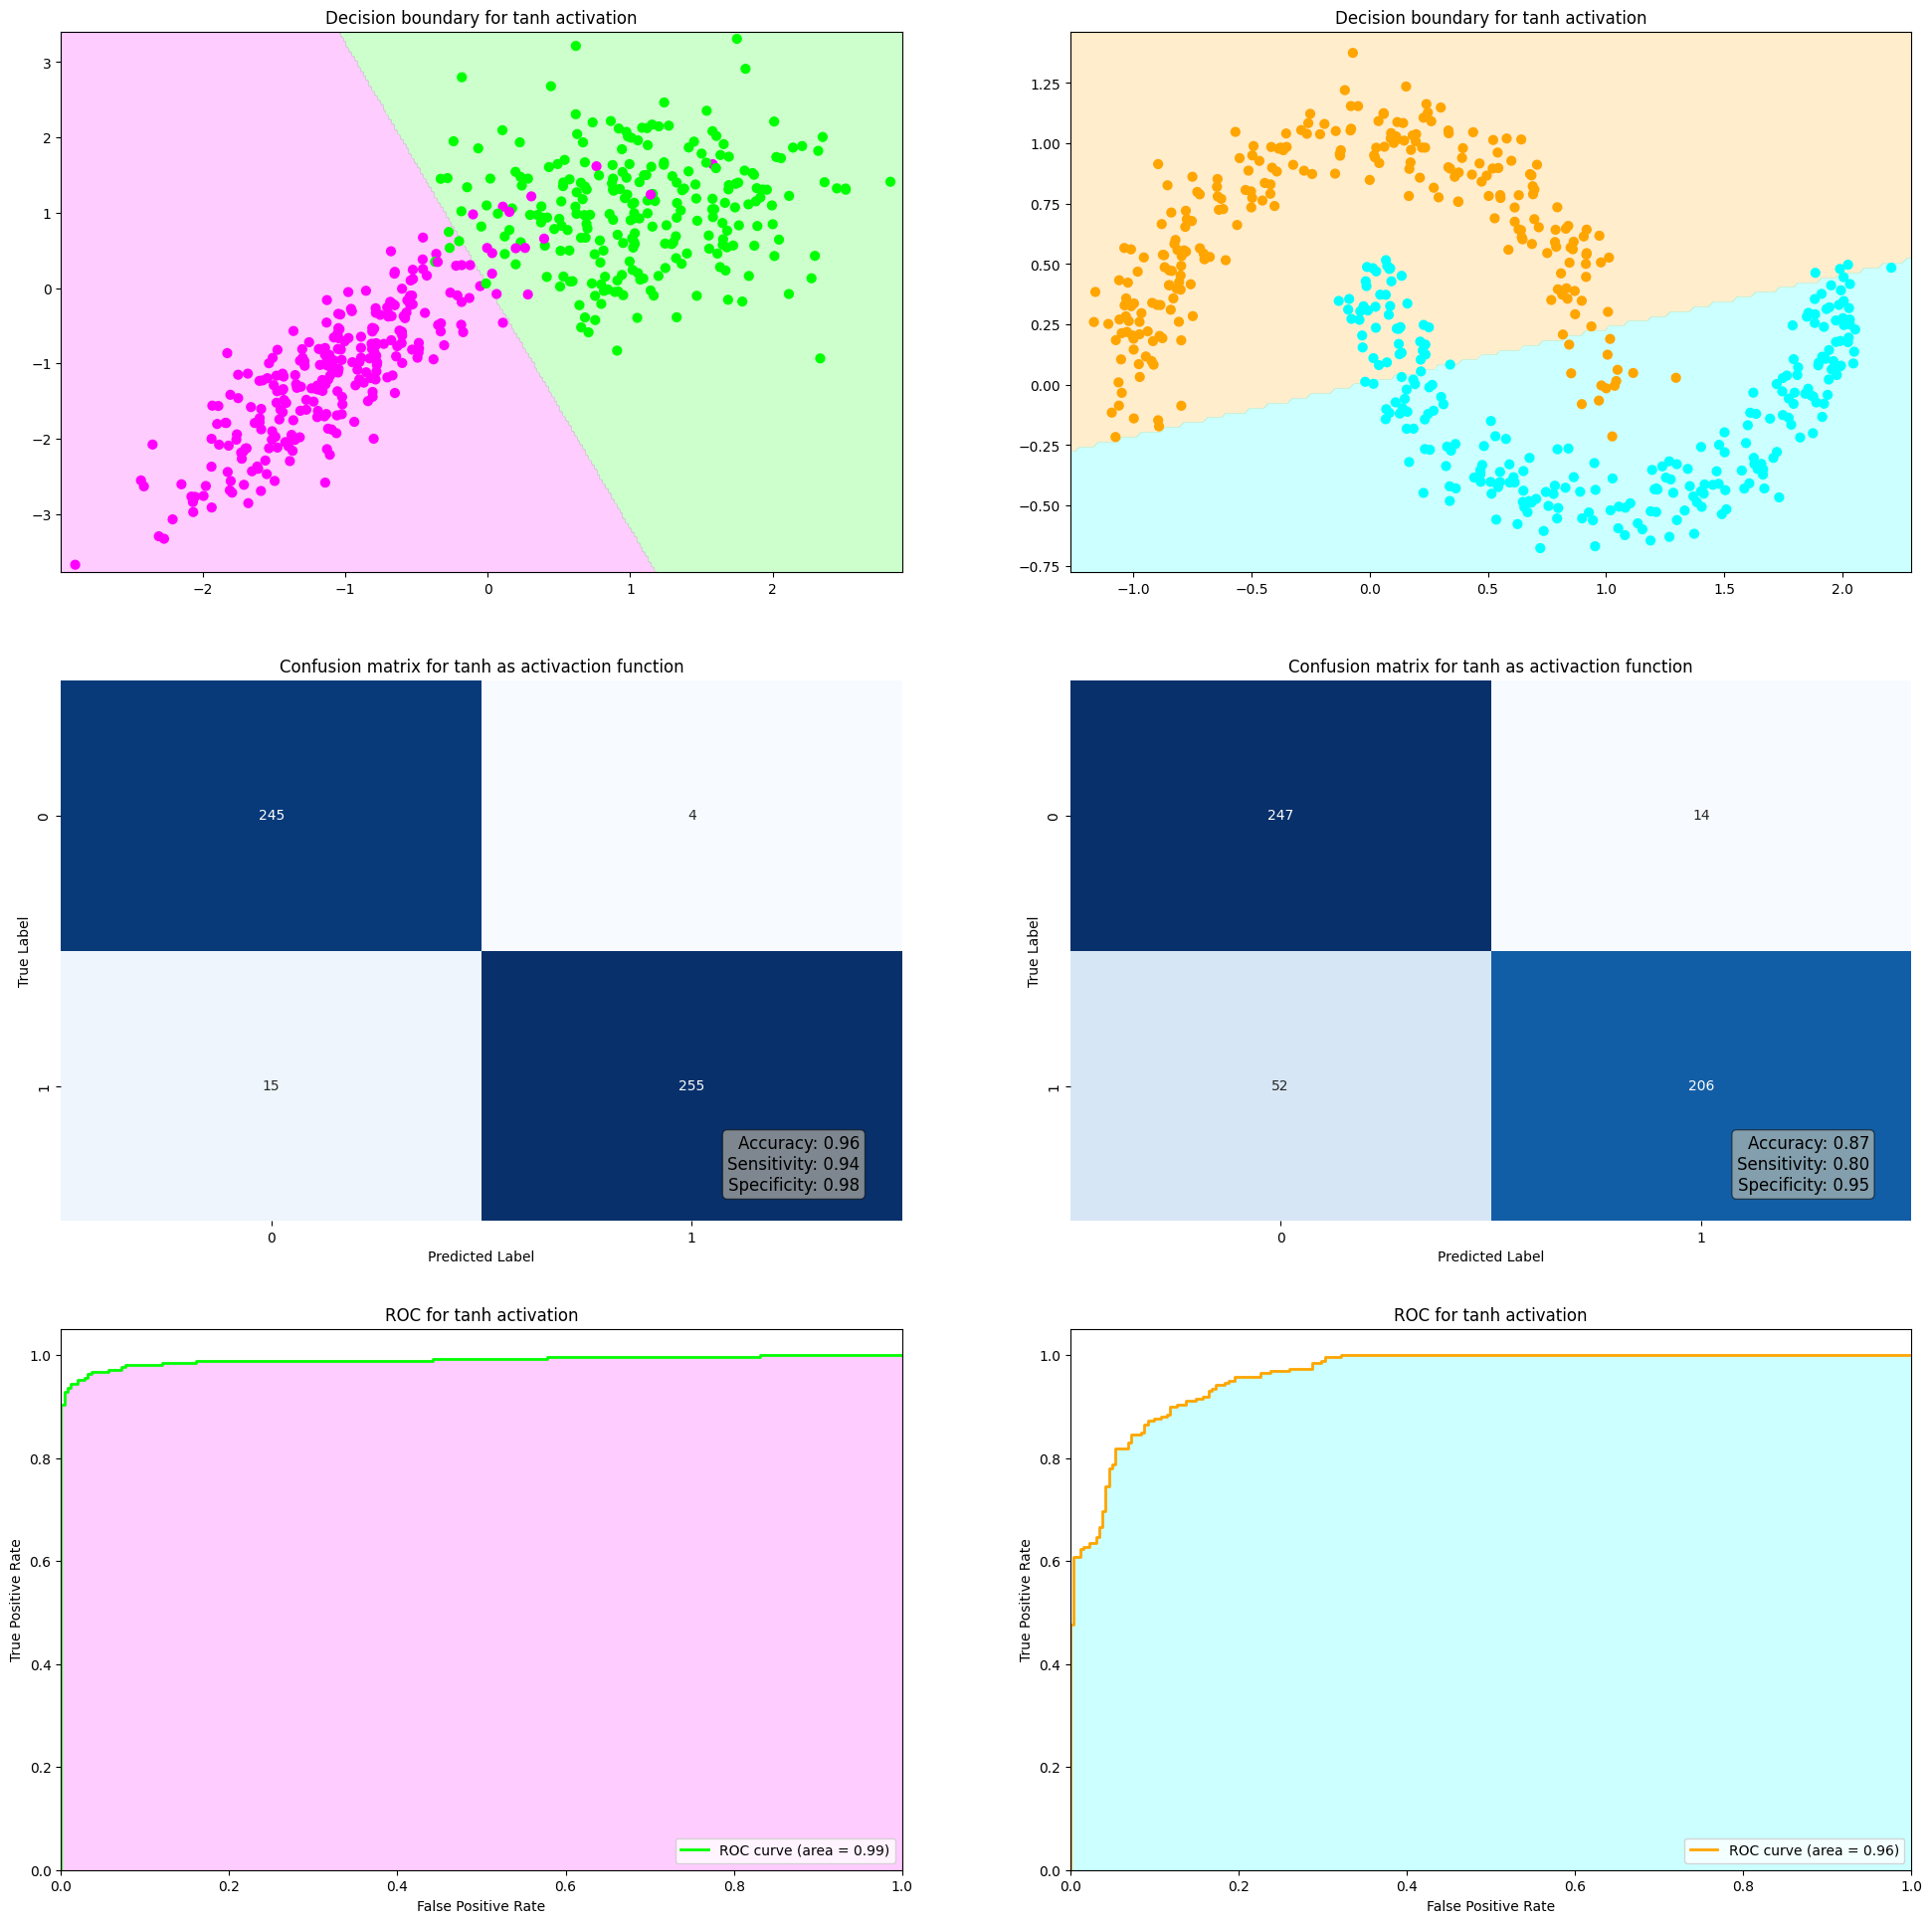

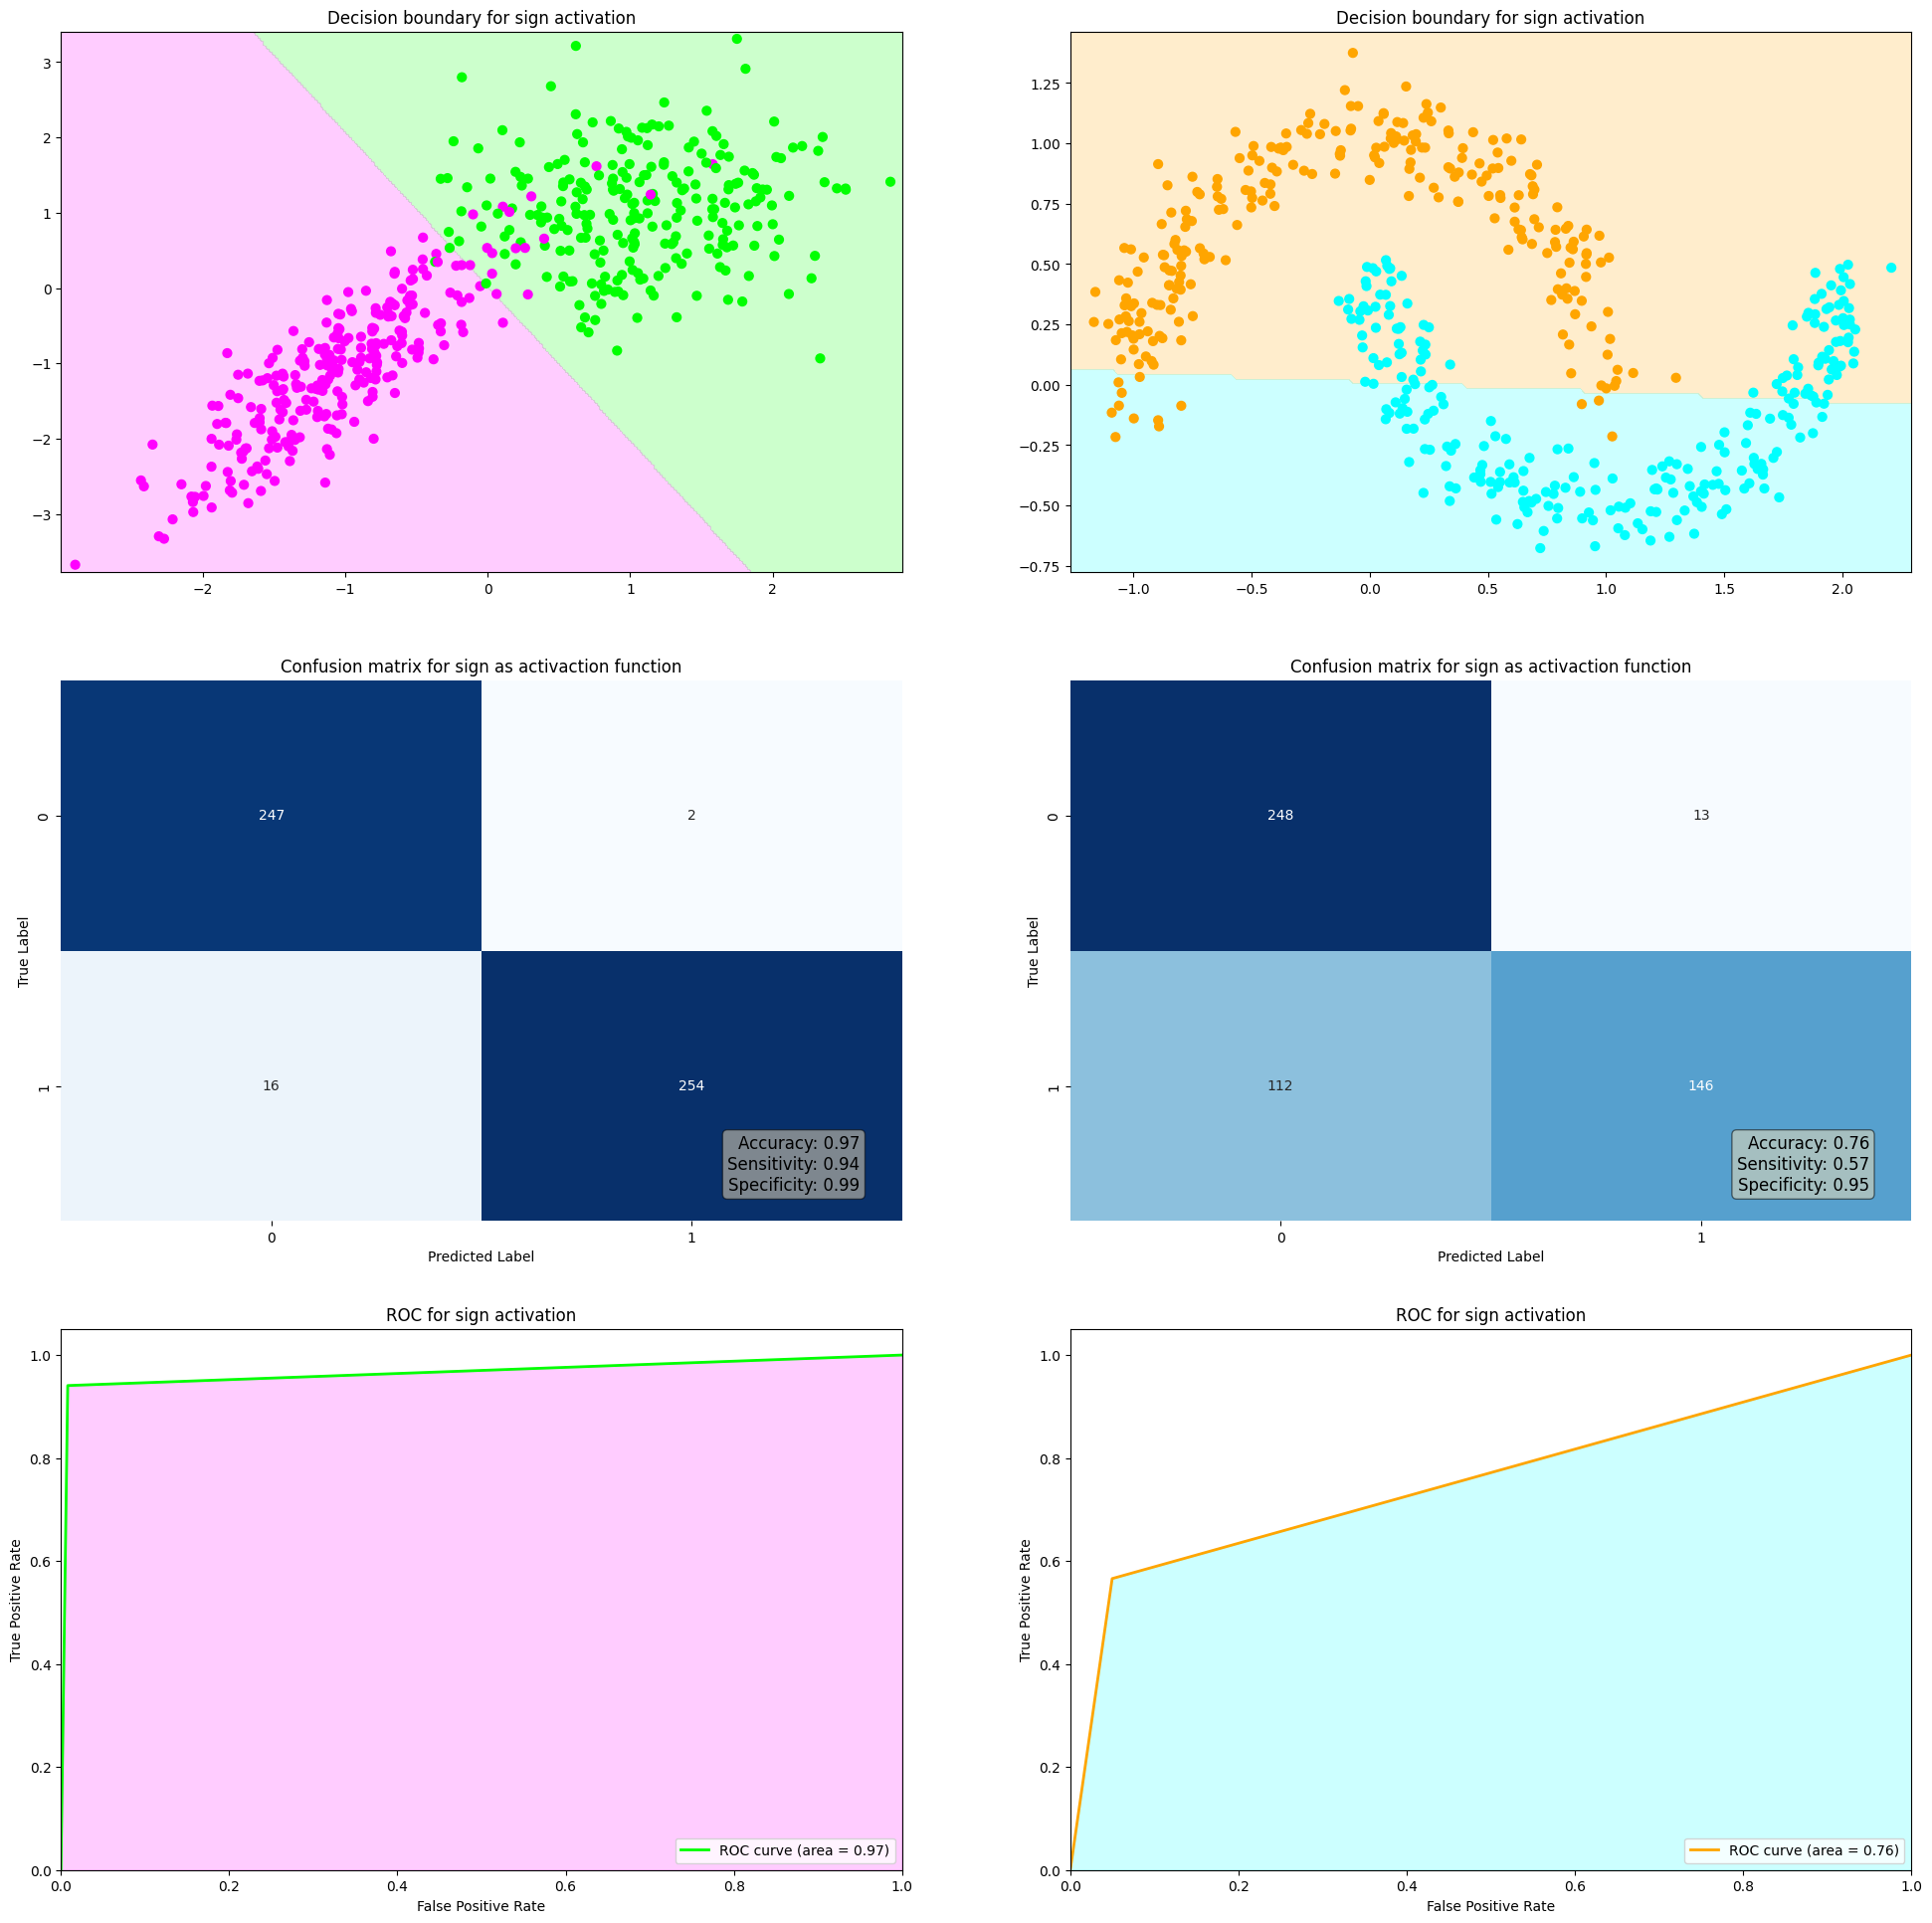

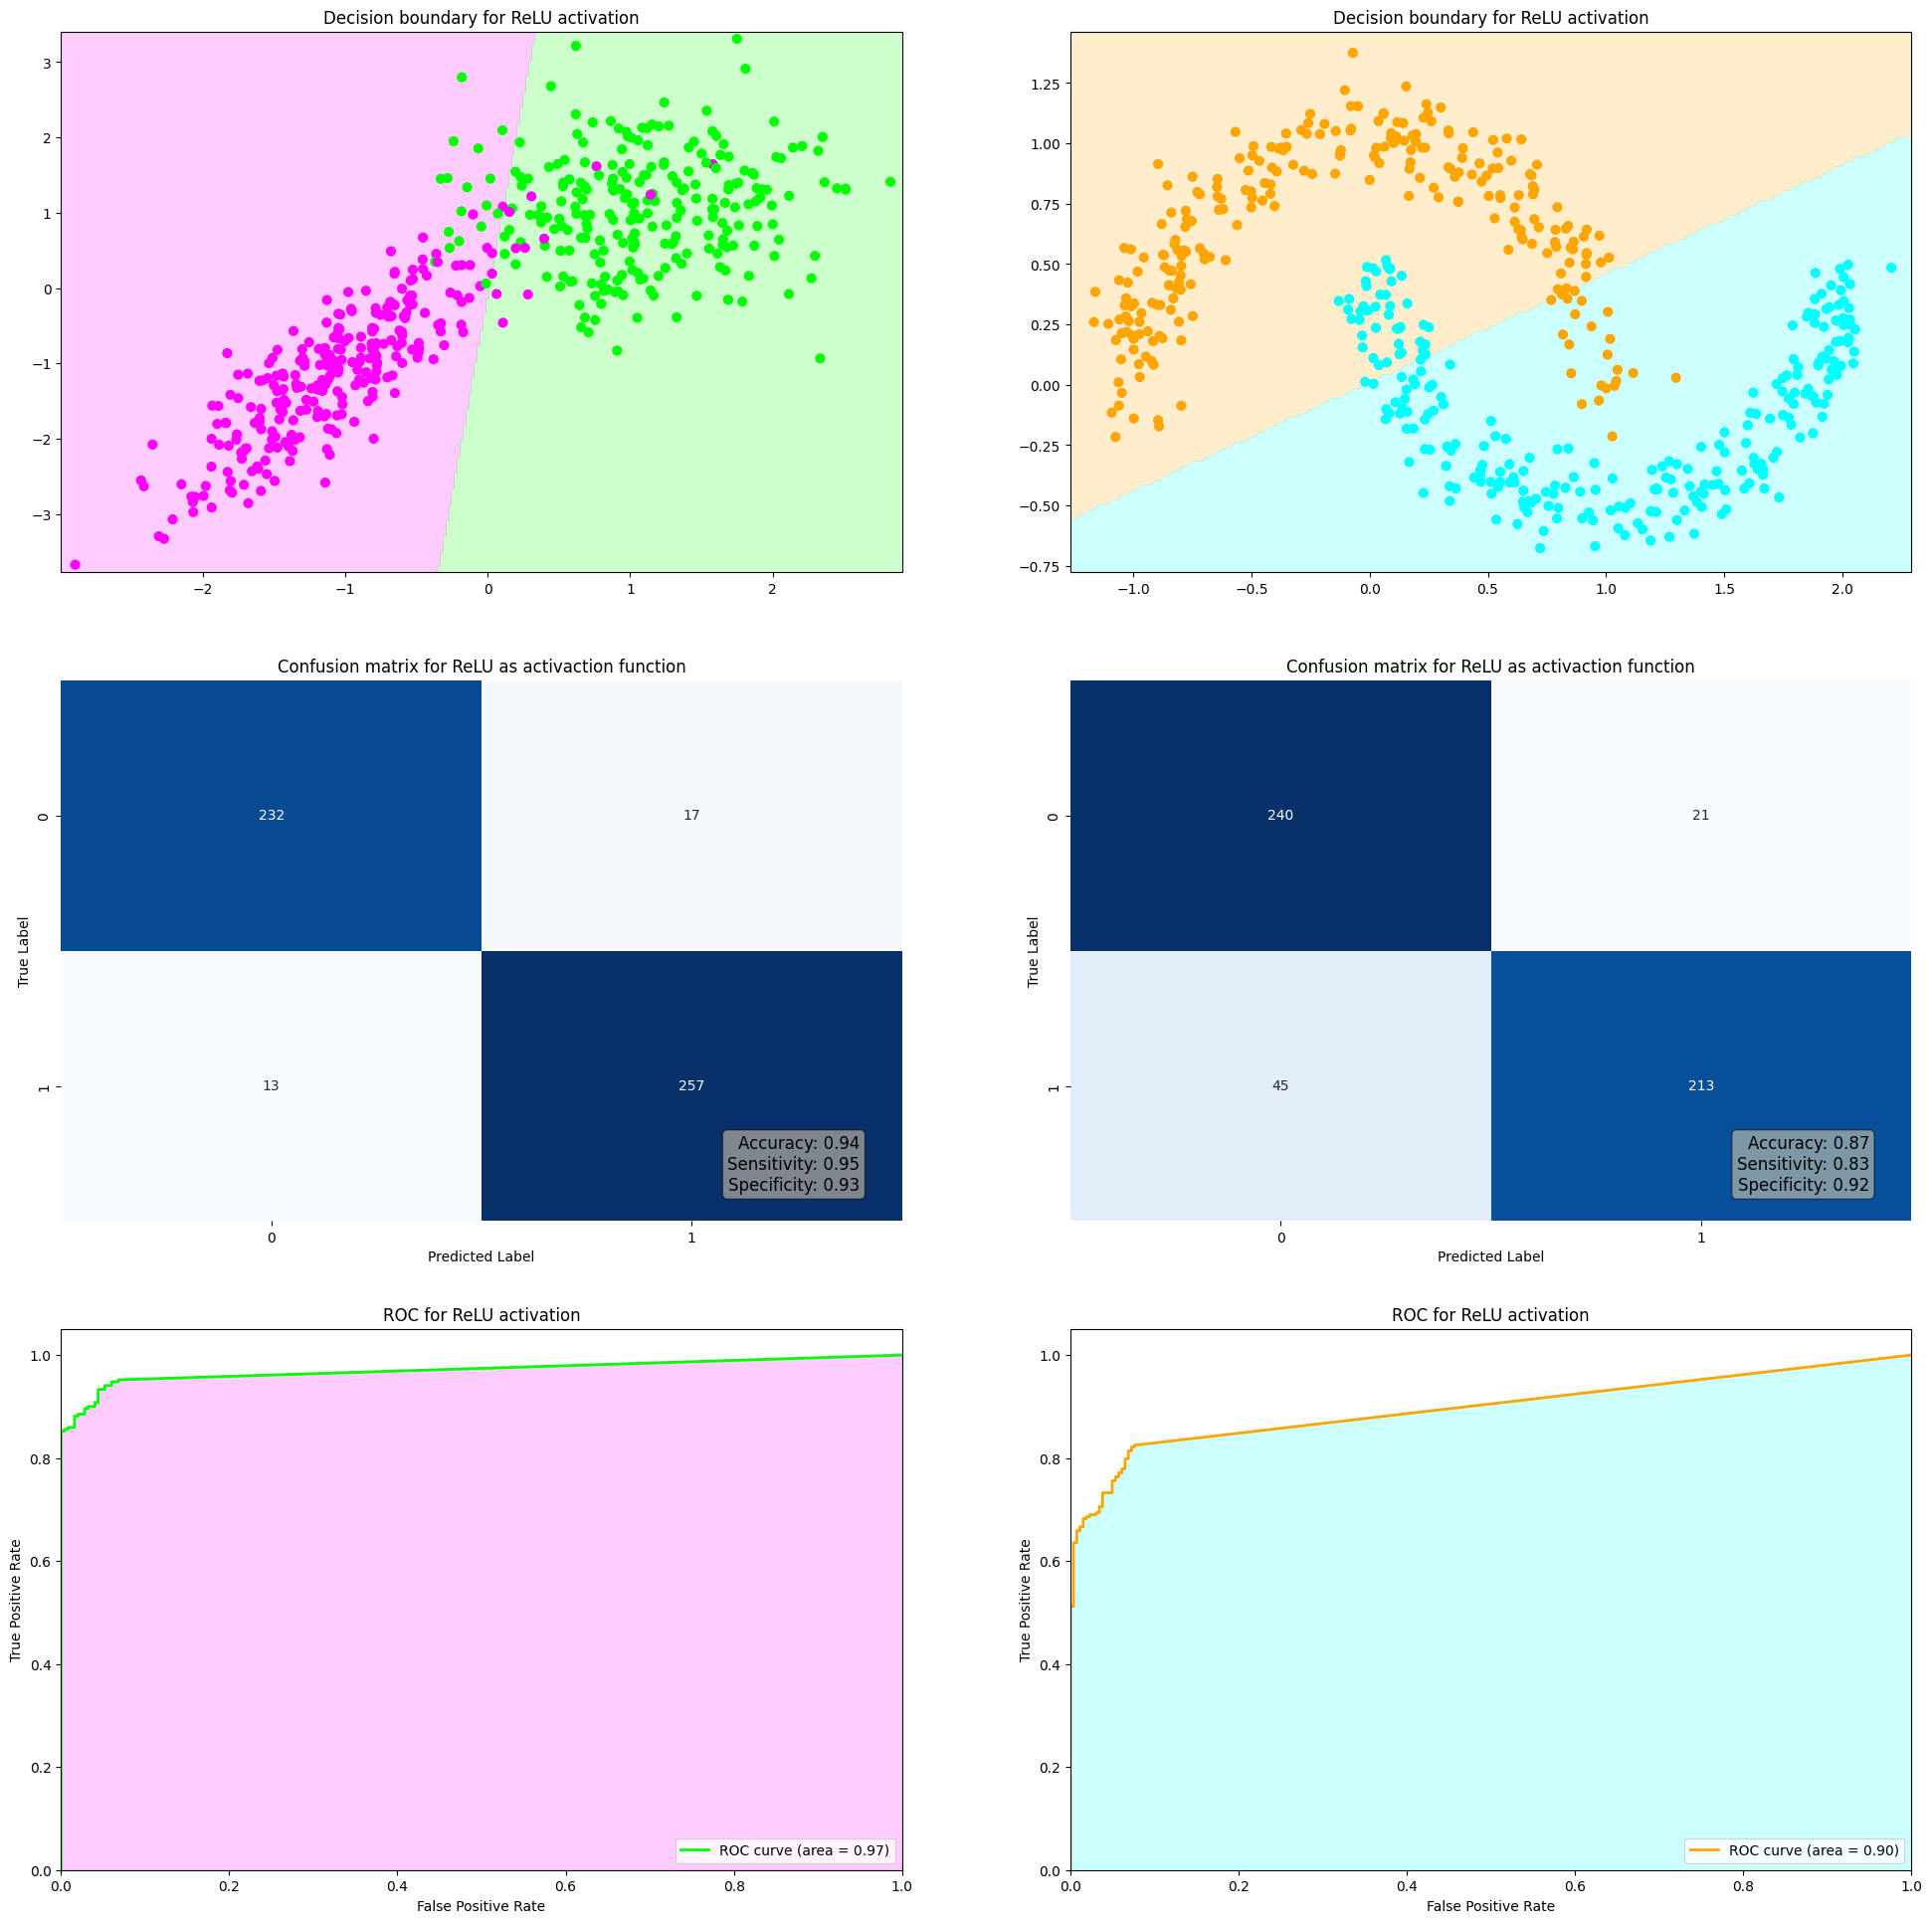

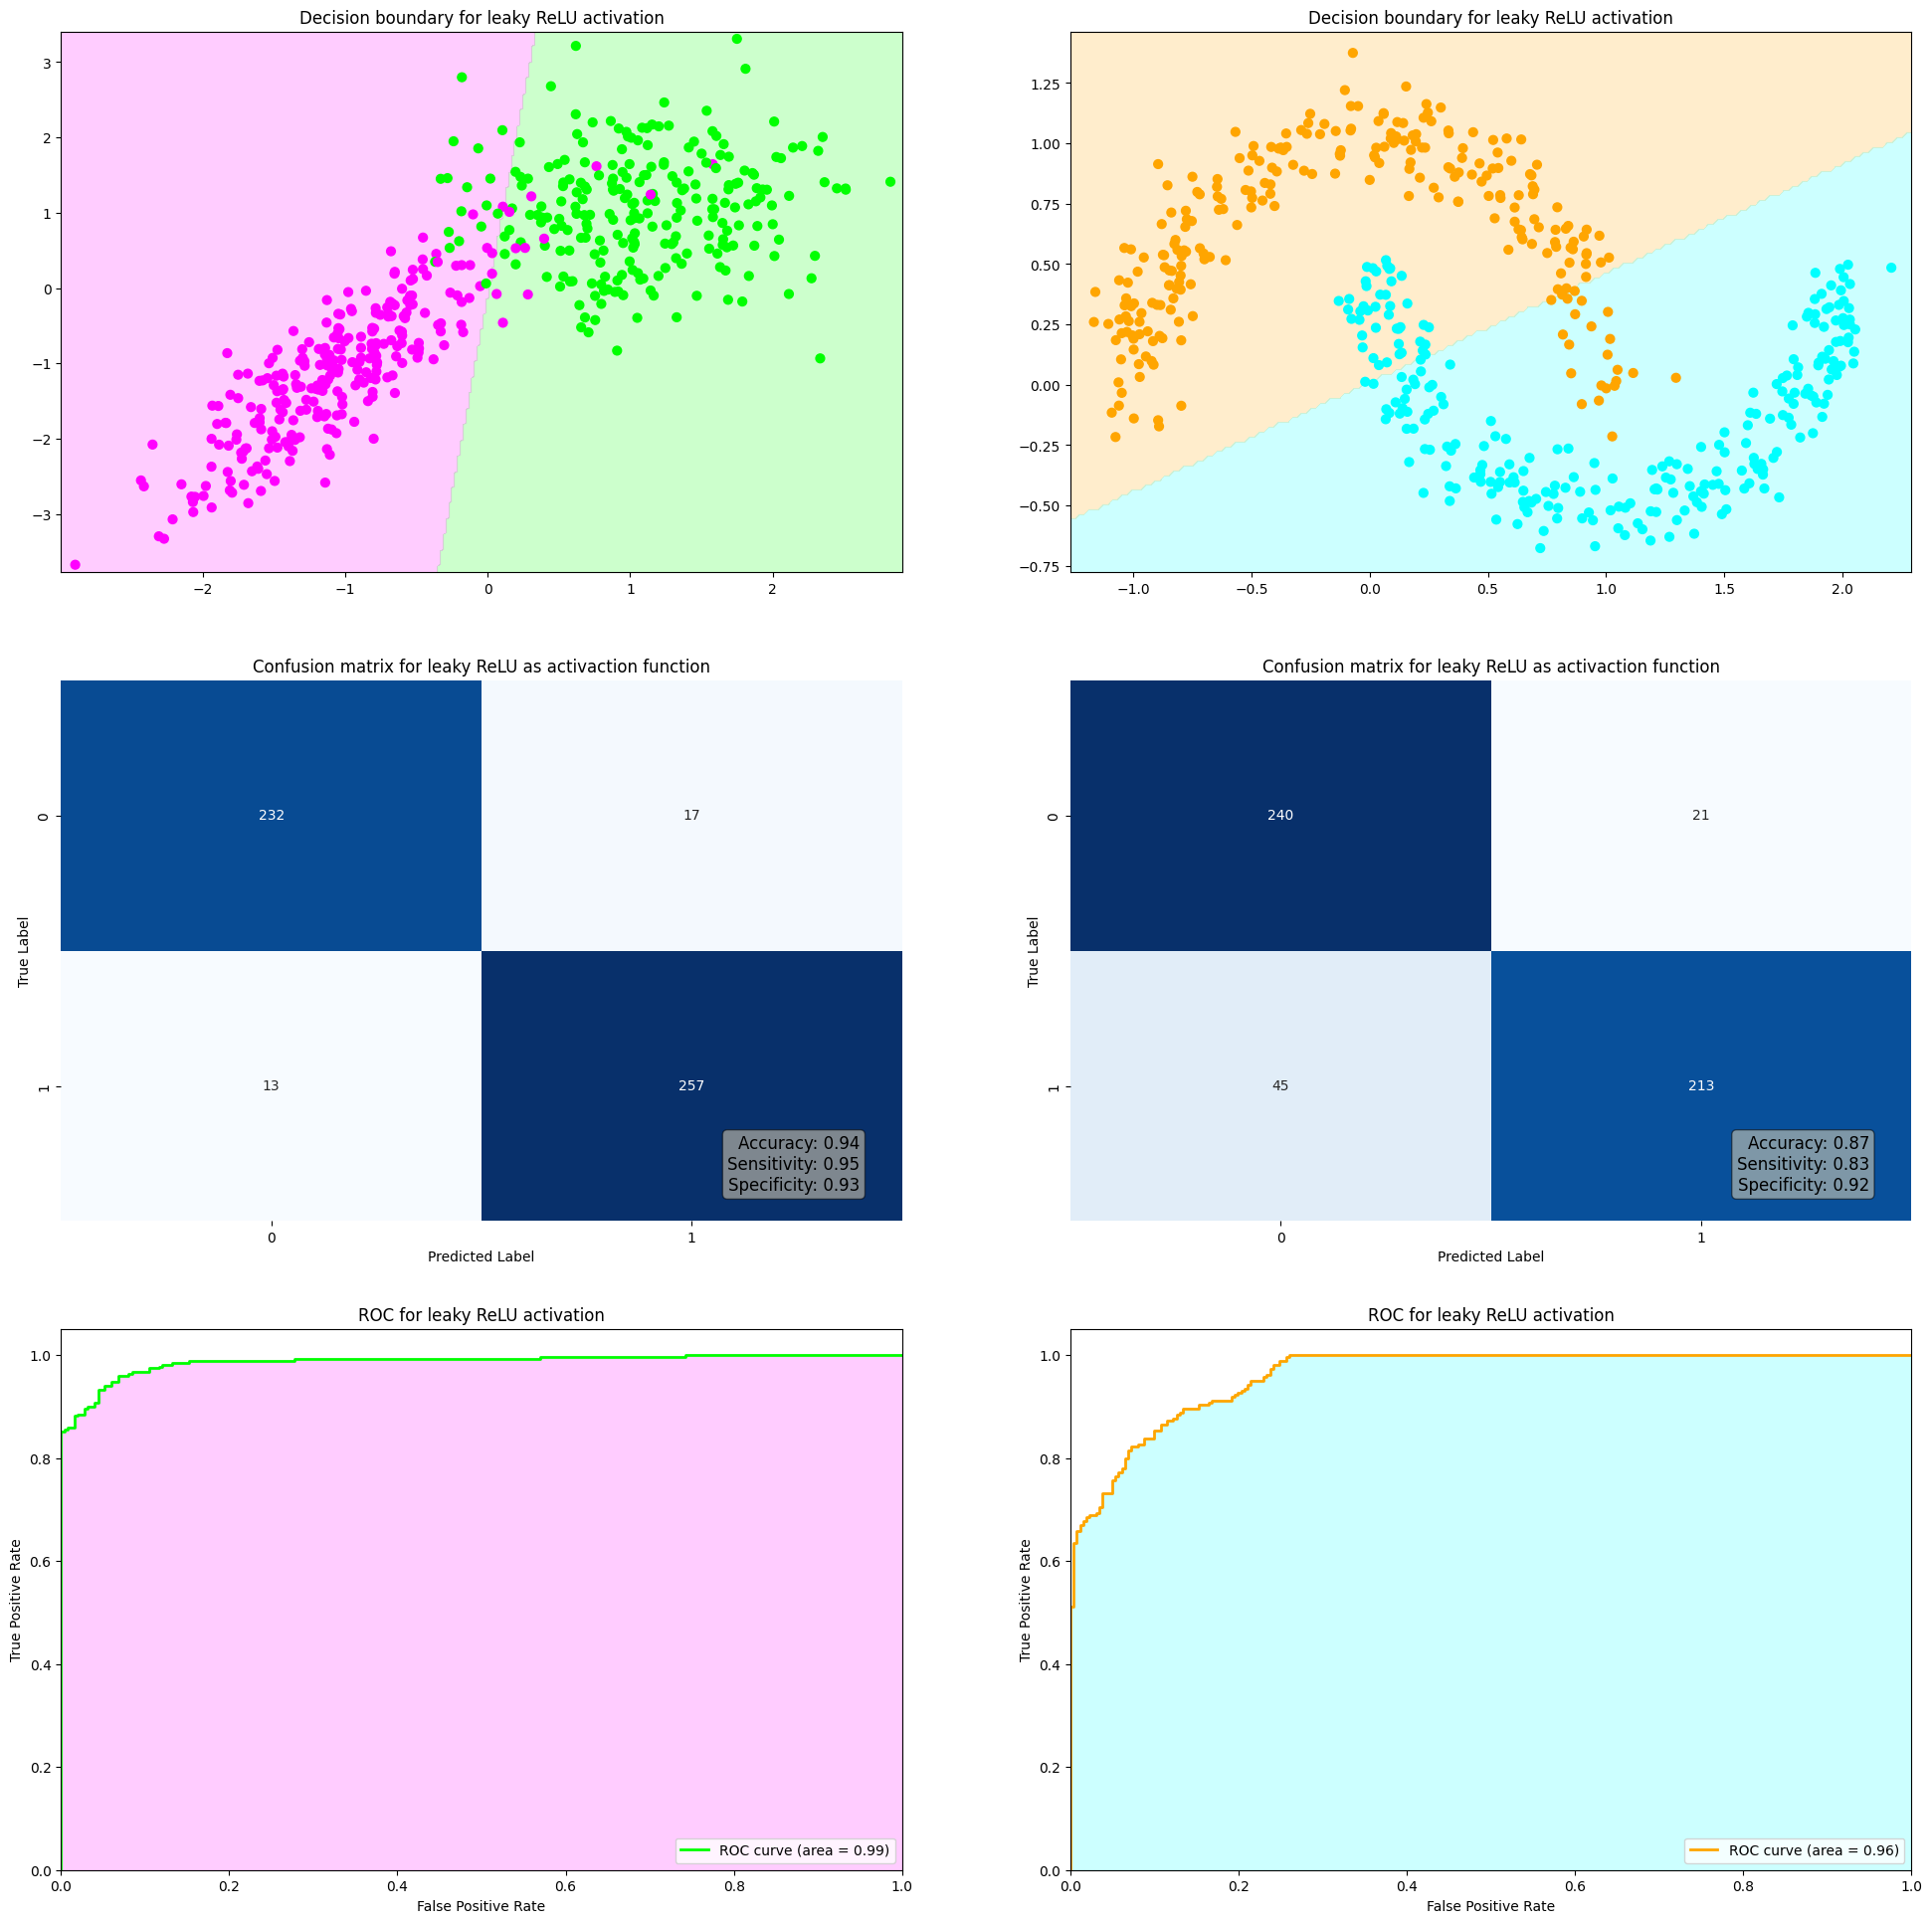

In [754]:
X_tests = [X_test_clf, X_test_moons]
y_tests = [y_test_clf, y_test_moons]

weightss = [[weights_sigmoid_clf, weights_sigmoid_moons],
            [weights_Heviside_clf, weights_Heviside_moons],
            [weights_sin_clf, weights_sin_moons],
            [weights_tanh_clf, weights_tanh_moons],
            [weights_sgn_clf, weights_sgn_moons],
            [weights_relu_clf, weights_relu_moons],
            [weights_leaky_relu_clf, weights_leaky_relu_moons]]

colours = [['lime', 'magenta'], ['orange', 'cyan']]

y_preds = [[y_pred_sigmoid_clf, y_pred_sigmoid_moons],
           [y_pred_Heviside_clf, y_pred_Heviside_moons],
           [y_pred_sin_clf, y_pred_sin_moons],
           [y_pred_tanh_clf, y_pred_tanh_moons],
           [y_pred_sgn_clf, y_pred_sgn_moons],
           [y_pred_relu_clf, y_pred_relu_moons],
           [y_pred_leaky_relu_clf, y_pred_leaky_relu_moons]]

model = ['logistic', 'Heaviside', 'sinus', 'tanh', 'sign', 'ReLU', 'leaky ReLU']

for mod, pred in zip(model, weightss):
    print(mod, ' ---> ', pred)

tresholds = [0.5, 0, 0, 0, 0, 0, 0]

functions = [sigmoid, Heviside, np.sin, np.tanh, sgn, relu, leaky_relu]

for i in range(7):
    fig, axs = plt.subplots(3, 2, figsize=(24, 24))
    plot_summary(axs, X_tests, y_tests, weightss[i], colours, functions[i], y_preds[i], model[i], tresholds[i])
    

In [775]:
import math

def neuron_learning_speed_change(X, t, function, derivative, b = 0.1, eta_min = 0.03, eta_max = 0.18, iterations = 10, batch_size = 10):
    n_samples, n_features = X.shape

    # w = np.array([0.1, 0.1, b])
    w = np.array([0.1, 0.1])


    for n in range(iterations):
        eta = eta_min + (eta_max - eta_min) * (1 + np.cos(n * math.pi / eta_max))
        
        for batch_start in range(0, n_samples, batch_size):
            X_batch = X[batch_start:batch_start + batch_size]
            t_batch = t[batch_start:batch_start + batch_size]

            gradients = np.zeros_like(w)

            for j in range(X_batch.shape[0]):
                s = np.dot(X_batch[j], w)
                y = function(s)
                error = t_batch[j] - y
                gradients -= eta * error * derivative(s) * X_batch[j]

            w -= gradients / X_batch.shape[0]

    return w

Logistic

In [776]:
weights_sigmoid_clf = neuron_learning_speed_change(X_train_clf, y_train_clf, sigmoid, sigmoid_derivative)
y_pred_sigmoid_clf = sigmoid(np.dot(X_test_clf, weights_sigmoid_clf)) > 0.5
accuracy_sigmoid_clf = accuracy_score(y_test_clf, y_pred_sigmoid_clf)
print("Accuracy:", accuracy_sigmoid_clf)

weights_sigmoid_moons = neuron_learning_speed_change(X_train_moons, y_train_moons, sigmoid, sigmoid_derivative)
y_pred_sigmoid_moons = sigmoid(np.dot(X_test_moons, weights_sigmoid_moons)) > 0.5
accuracy_sigmoid_moons = accuracy_score(y_test_moons, y_pred_sigmoid_moons)
print("Accuracy:", accuracy_sigmoid_moons)

Accuracy: 0.9672447013487476
Accuracy: 0.8805394990366089


Heviside

In [777]:
weights_Heviside_clf = neuron_learning_speed_change(X_train_clf, y_train_clf, Heviside, Heviside_derivative)
y_pred_Heviside_clf = Heviside(np.dot(X_test_clf, weights_Heviside_clf))
accuracy_Heviside_clf = accuracy_score(y_test_clf, y_pred_Heviside_clf)
print("Accuracy:", accuracy_Heviside_clf)

weights_Heviside_moons= neuron_learning_speed_change(X_train_moons, y_train_moons, Heviside, Heviside_derivative)
y_pred_Heviside_moons = Heviside(np.dot(X_test_moons, weights_Heviside_moons))
accuracy_Heviside_moons = accuracy_score(y_test_moons, y_pred_Heviside_moons)
print("Accuracy:", accuracy_Heviside_moons)

Accuracy: 0.8786127167630058
Accuracy: 0.7552986512524085


Sinus

In [778]:
weights_sin_clf = neuron_learning_speed_change(X_train_clf, y_train_clf_changed_label, np.sin, np.cos)
y_pred_sin_clf = np.sin(np.dot(X_test_clf, weights_sin_clf)) > 0
accuracy_sin_clf = accuracy_score(y_test_clf, y_pred_sin_clf)
print("Accuracy:", accuracy_sin_clf)

weights_sin_moons = neuron_learning_speed_change(X_train_moons, y_train_moons_changed_label, np.sin, np.cos)
y_pred_sin_moons = np.sin(np.dot(X_test_moons, weights_sin_moons)) > 0
accuracy_sin_moons = accuracy_score(y_test_moons, y_pred_sin_moons)
print("Accuracy:", accuracy_sin_moons)

Accuracy: 0.9576107899807321
Accuracy: 0.8747591522157996


Tanh

In [779]:
weights_tanh_clf = neuron_learning_speed_change(X_train_clf, y_train_clf_changed_label, np.tanh, tanh_derivative)
y_pred_tanh_clf = np.tanh(np.dot(X_test_clf, weights_tanh_clf)) > 0
accuracy_tanh_clf = accuracy_score(y_test_clf, y_pred_tanh_clf)
print("Accuracy:", accuracy_tanh_clf)

weights_tanh_moons = neuron_learning_speed_change(X_train_moons, y_train_moons_changed_label, np.tanh, tanh_derivative)
y_pred_tanh_moons = np.tanh(np.dot(X_test_moons, weights_tanh_moons)) > 0
accuracy_tanh_moons = accuracy_score(y_test_moons, y_pred_tanh_moons)
print("Accuracy:", accuracy_tanh_moons)

Accuracy: 0.9653179190751445
Accuracy: 0.8689788053949904


Signum

In [780]:
weights_sgn_clf = neuron_learning_speed_change(X_train_clf, y_train_clf_changed_label, sgn, sgn_derivative)
y_pred_sgn_clf = np.sign(np.dot(X_test_clf, weights_sgn_clf)) > 0
accuracy_sgn_clf = accuracy_score(y_test_clf, y_pred_sgn_clf)
print("Accuracy:", accuracy_sgn_clf)

weights_sgn_moons = neuron_learning_speed_change(X_train_moons, y_train_moons_changed_label, sgn, sgn_derivative)
y_pred_sgn_moons = np.sign(np.dot(X_test_moons, weights_sgn_moons)) > 0
accuracy_sgn_moons = accuracy_score(y_test_moons, y_pred_sgn_moons)
print("Accuracy:", accuracy_sgn_moons)

Accuracy: 0.9479768786127167
Accuracy: 0.8458574181117534


ReLU

In [781]:
weights_relu_clf = neuron_learning_speed_change(X_train_clf, y_train_clf, relu, relu_derivative, 0.03, 0.18)
y_pred_relu_clf = relu(np.dot(X_test_clf, weights_relu_clf)) > 0
accuracy_relu_clf = accuracy_score(y_test_clf, y_pred_relu_clf)
print("Accuracy:", accuracy_relu_clf)

weights_relu_moons = neuron_learning_speed_change(X_train_moons, y_train_moons, relu, relu_derivative)
y_pred_relu_moons = relu(np.dot(X_test_moons, weights_relu_moons)) > 0
accuracy_relu_moons = accuracy_score(y_test_moons, y_pred_relu_moons)
print("Accuracy:", accuracy_relu_moons)

Accuracy: 0.9421965317919075
Accuracy: 0.8689788053949904


Leaky ReLU

In [782]:
weights_leaky_relu_clf = neuron_learning_speed_change(X_train_clf, y_train_clf, leaky_relu, leaky_relu_derivative, 0.03, 0.18)
y_pred_leaky_relu_clf = leaky_relu(np.dot(X_test_clf, weights_leaky_relu_clf)) > 0
accuracy_leaky_relu_clf = accuracy_score(y_test_clf, y_pred_leaky_relu_clf)
print("Accuracy:", accuracy_leaky_relu_clf)

weights_leaky_relu_moons = neuron_learning_speed_change(X_train_moons, y_train_moons, leaky_relu, leaky_relu_derivative)
y_pred_leaky_relu_moons = leaky_relu(np.dot(X_test_moons, weights_leaky_relu_moons)) > 0
accuracy_leaky_relu_moons = accuracy_score(y_test_moons, y_pred_leaky_relu_moons)
print("Accuracy:", accuracy_leaky_relu_moons)

Accuracy: 0.9421965317919075
Accuracy: 0.8689788053949904


In [783]:
# best_score = [0, [], []]

# for i in range(15):
#     for j in range(15):
#         print('i = ', i,  ', j = ', j)
#         weights_leaky_relu_clf = neuron_learning_speed_change(X_train_clf, y_train_clf, relu, relu_derivative, eta_min=i/100, eta_max=0.15 +j/100)
#         y_pred_relu_clf = relu(np.dot(X_test_clf, weights_relu_clf)) > 0
#         accuracy_relu_clf = accuracy_score(y_test_clf, y_pred_relu_clf)

#         weights_relu_moons = neuron_learning_speed_change(X_train_moons, y_train_moons, relu, relu_derivative, eta_min=i/100, eta_max=0.15 +j/100)
#         y_pred_relu_moons = relu(np.dot(X_test_moons, weights_relu_moons)) > 0
#         accuracy_relu_moons = accuracy_score(y_test_moons, y_pred_relu_moons)


#         score = accuracy_relu_clf + accuracy_relu_moons
#         if score > best_score[0]:
#             best_score = [score, [i,j], [accuracy_relu_clf, accuracy_leaky_relu_moons]]

# print(best_score)

logistic  --->  [array([-2.42068379, -1.24621729]), array([ 0.99852657, -3.27724029])]
Heaviside  --->  [array([-0.06027067,  0.02800557]), array([-0.00796242, -0.11675142])]
sinus  --->  [array([-0.85716922, -0.19415505]), array([ 0.44397103, -1.85968635])]
tanh  --->  [array([-1.89166736, -0.63296239]), array([ 0.48614613, -2.27904417])]
sign  --->  [array([-0.41914076, -0.02190548]), array([ 0.03910037, -0.25206901])]
ReLU  --->  [array([-0.81556482,  0.0801677 ]), array([ 0.47887327, -1.01203215])]
leaky ReLU  --->  [array([-0.81561652,  0.08053093]), array([ 0.47930694, -1.00867855])]


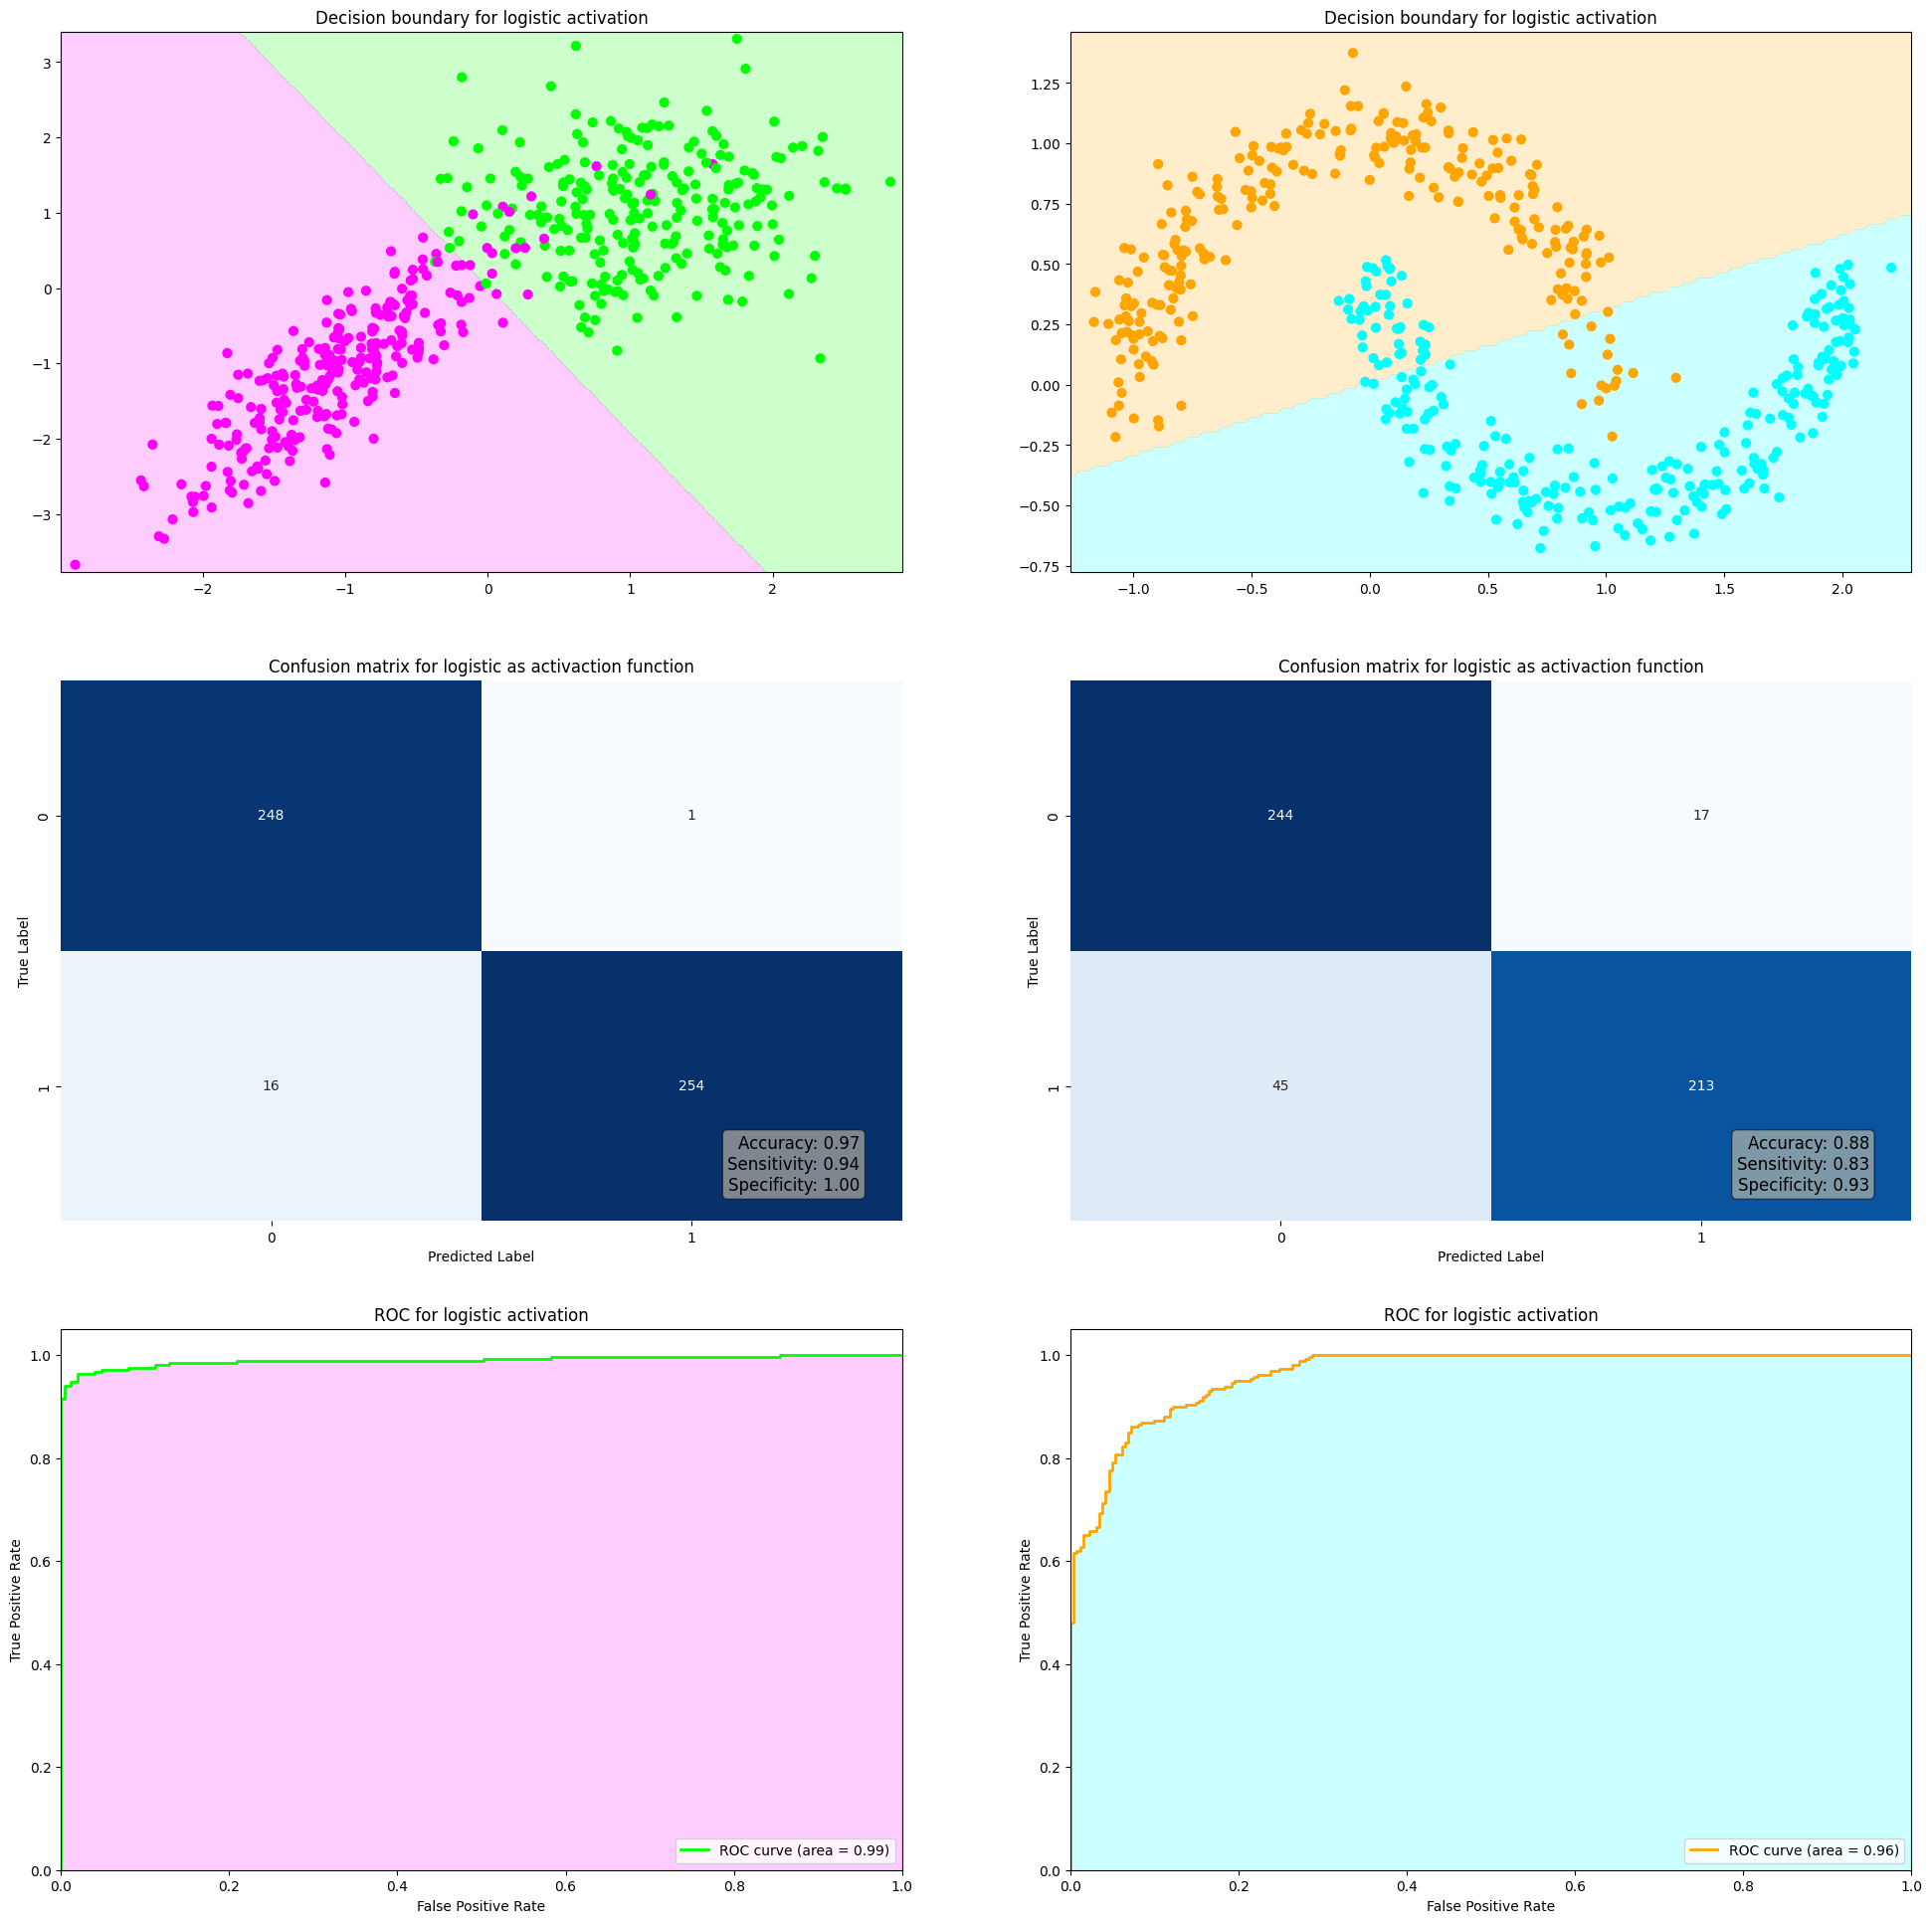

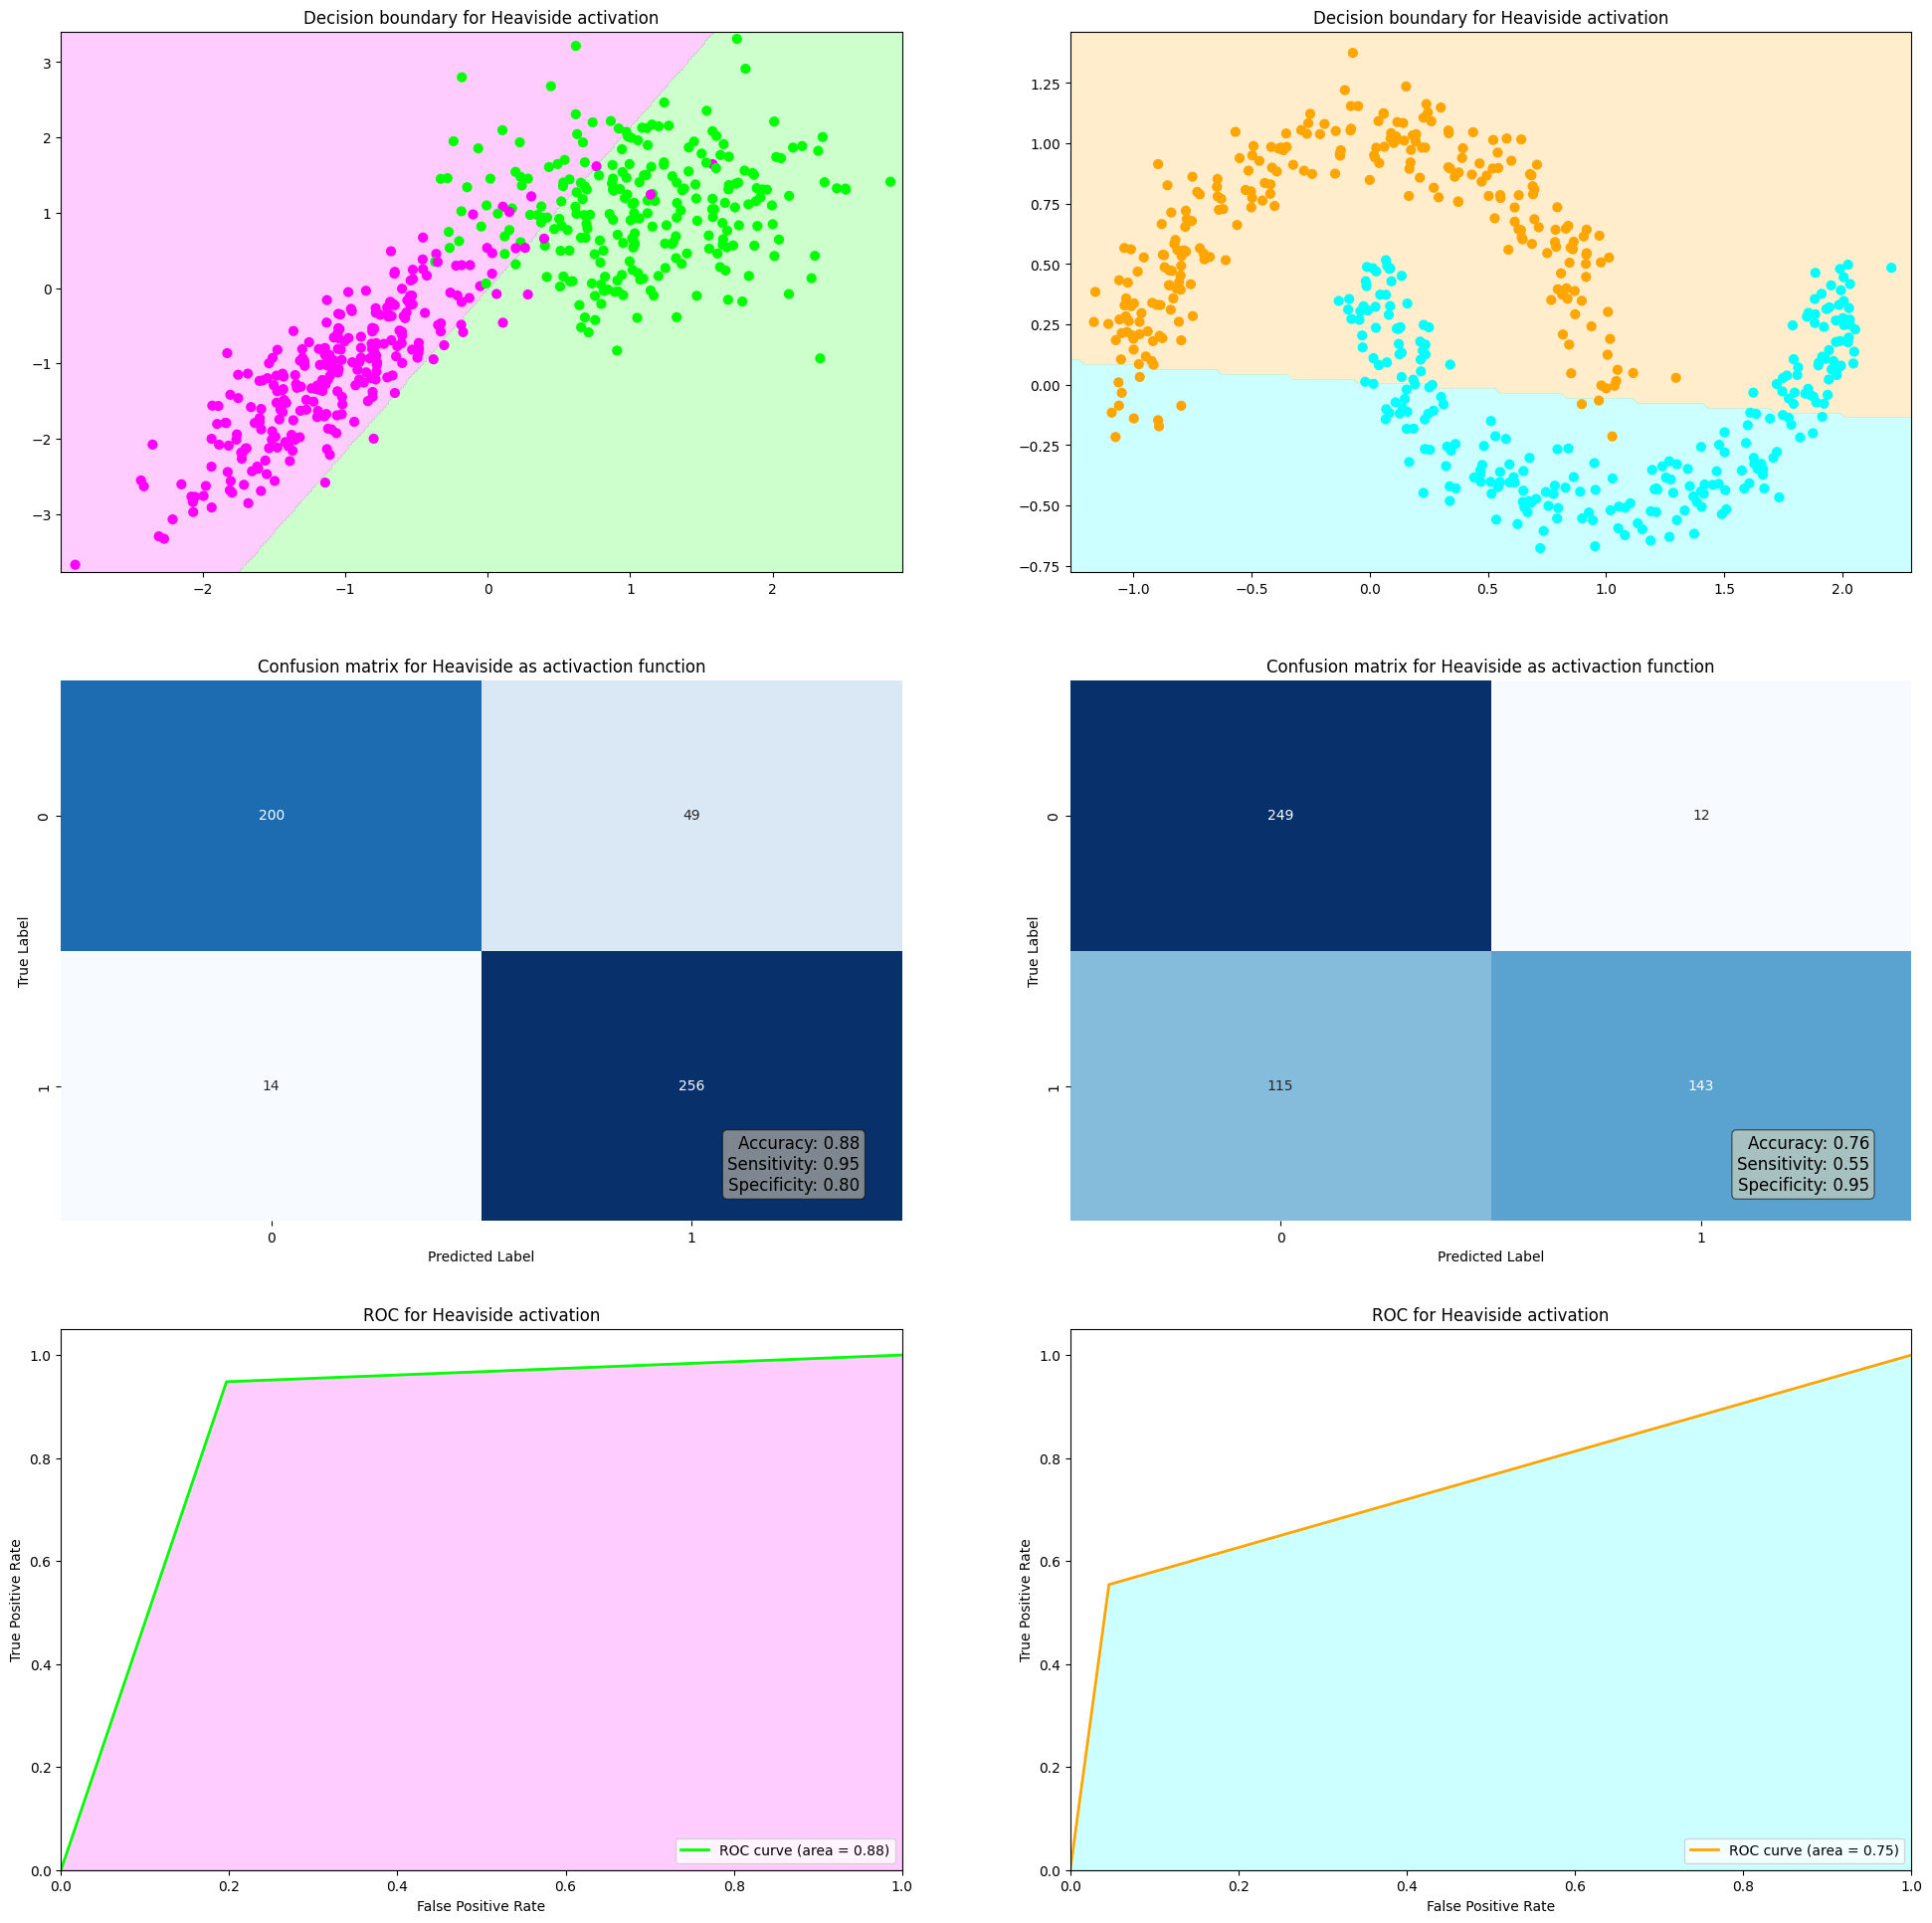

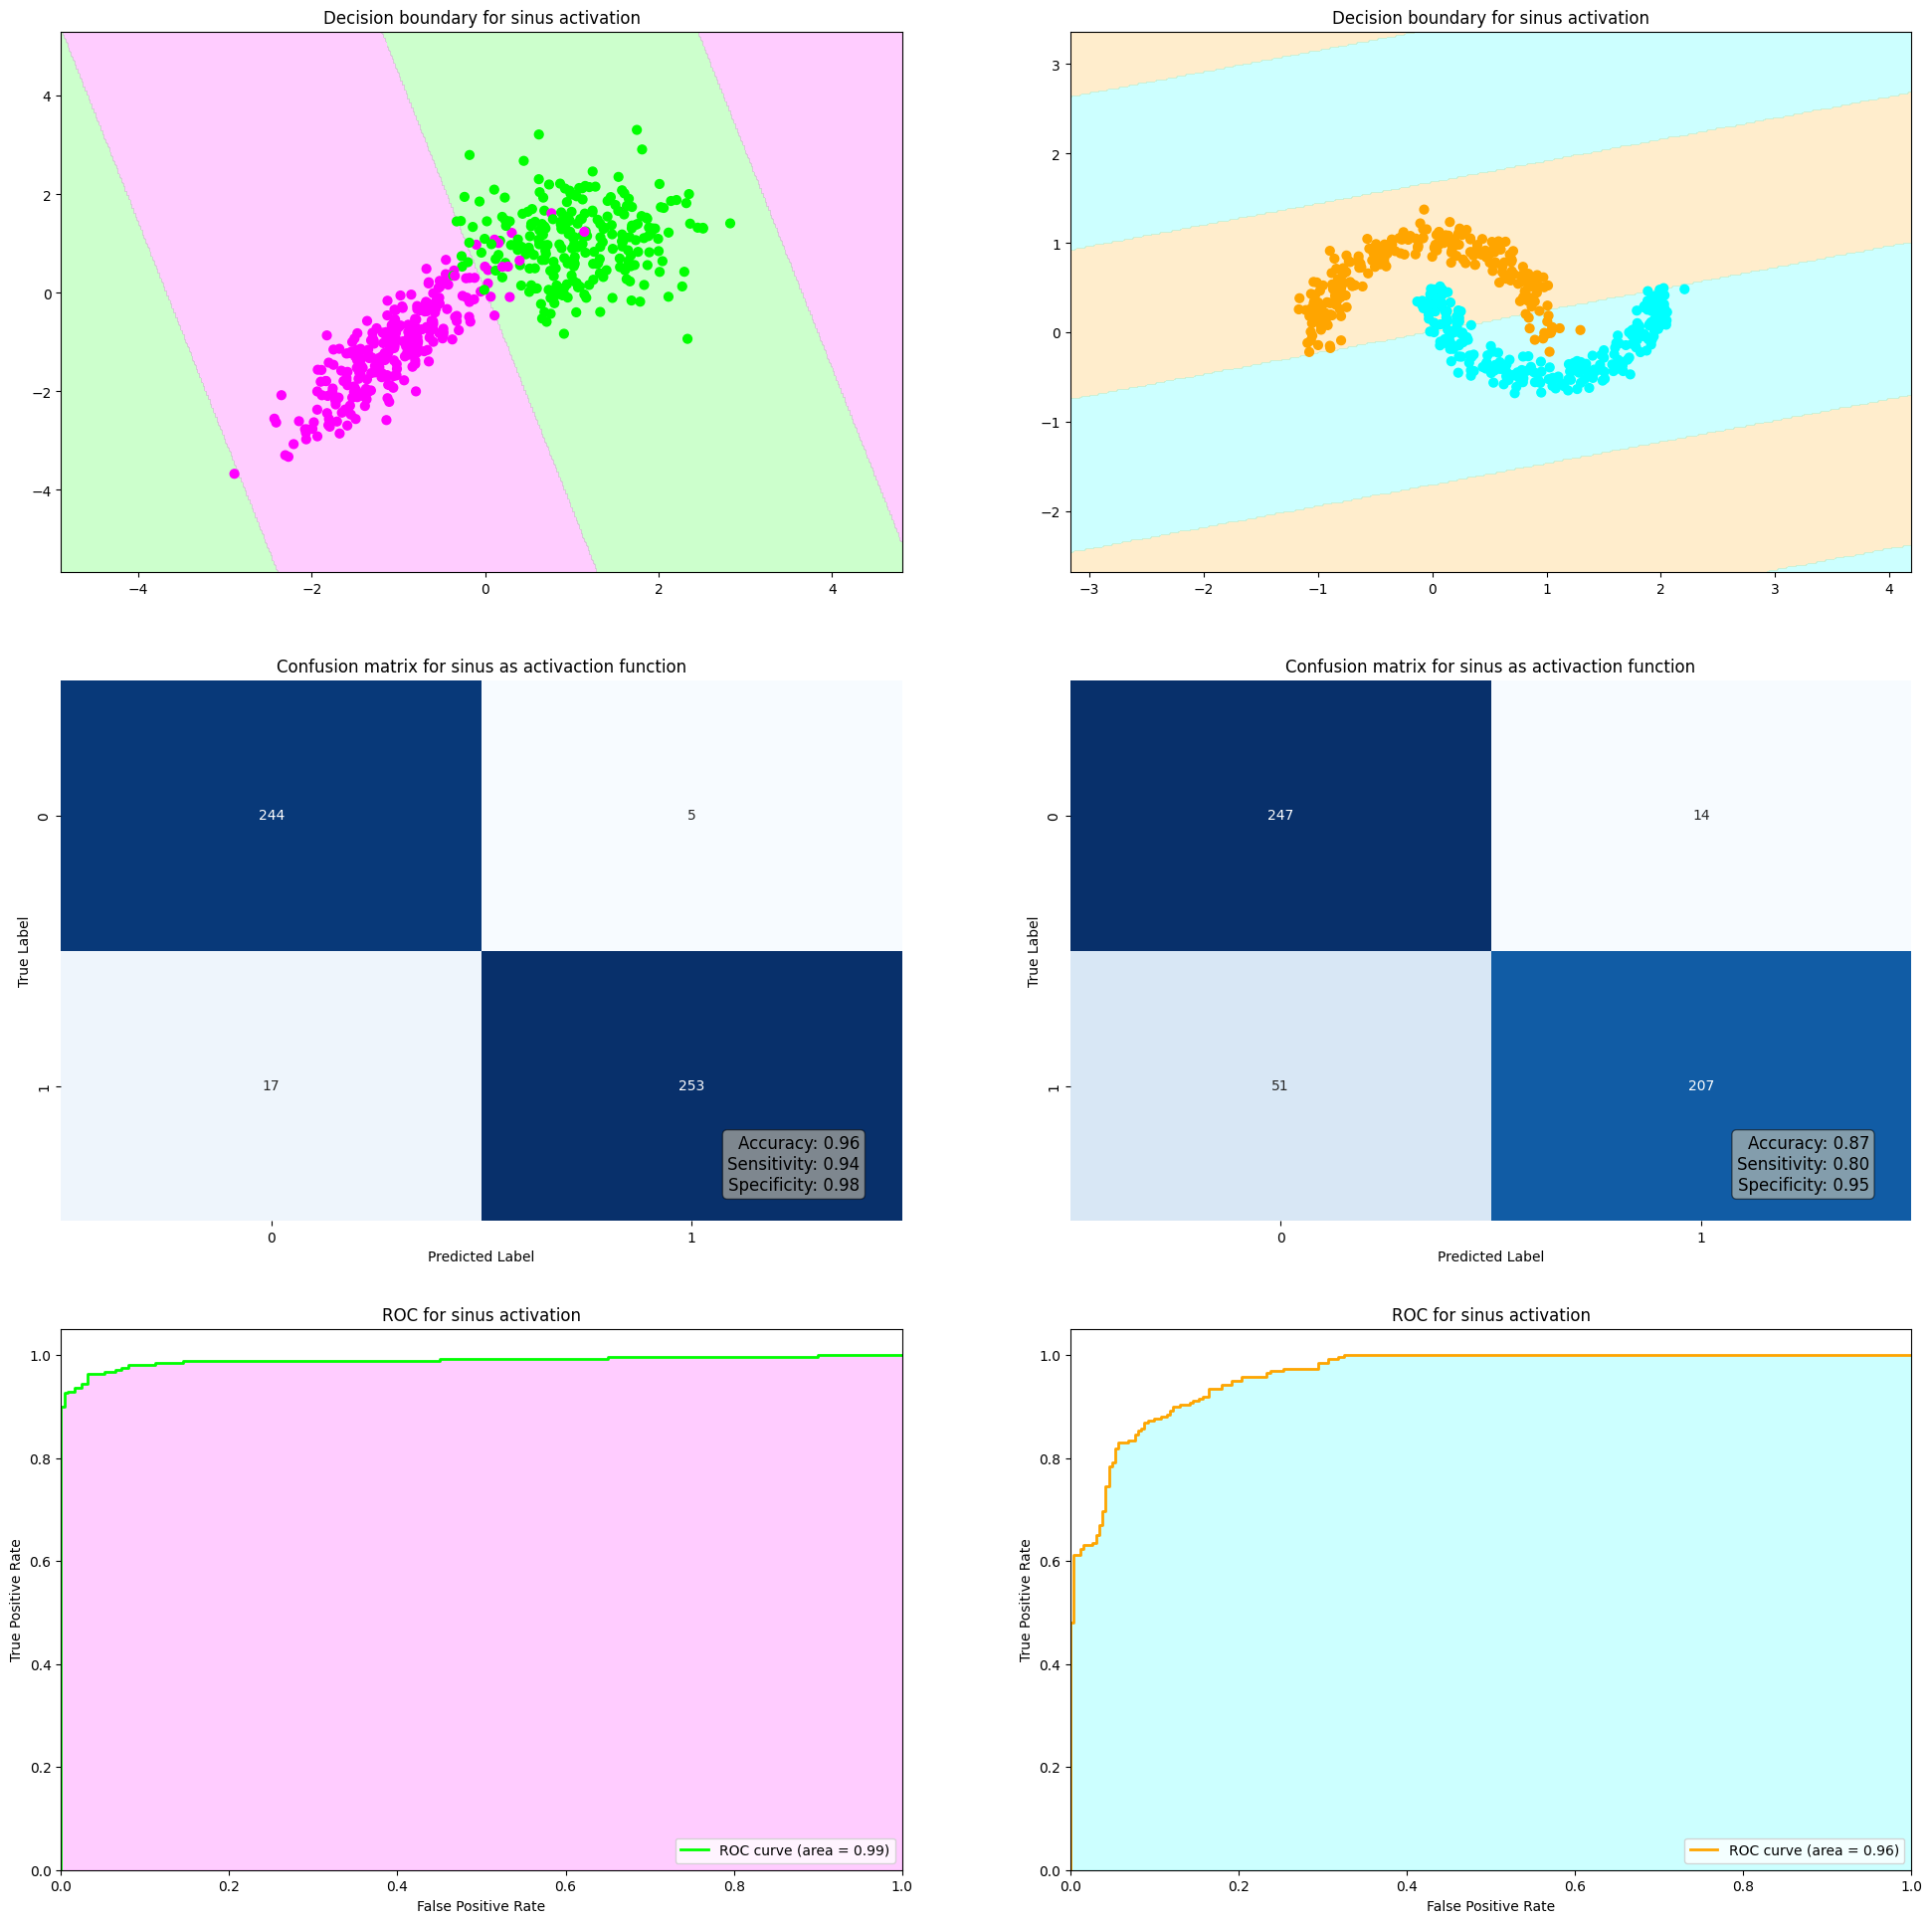

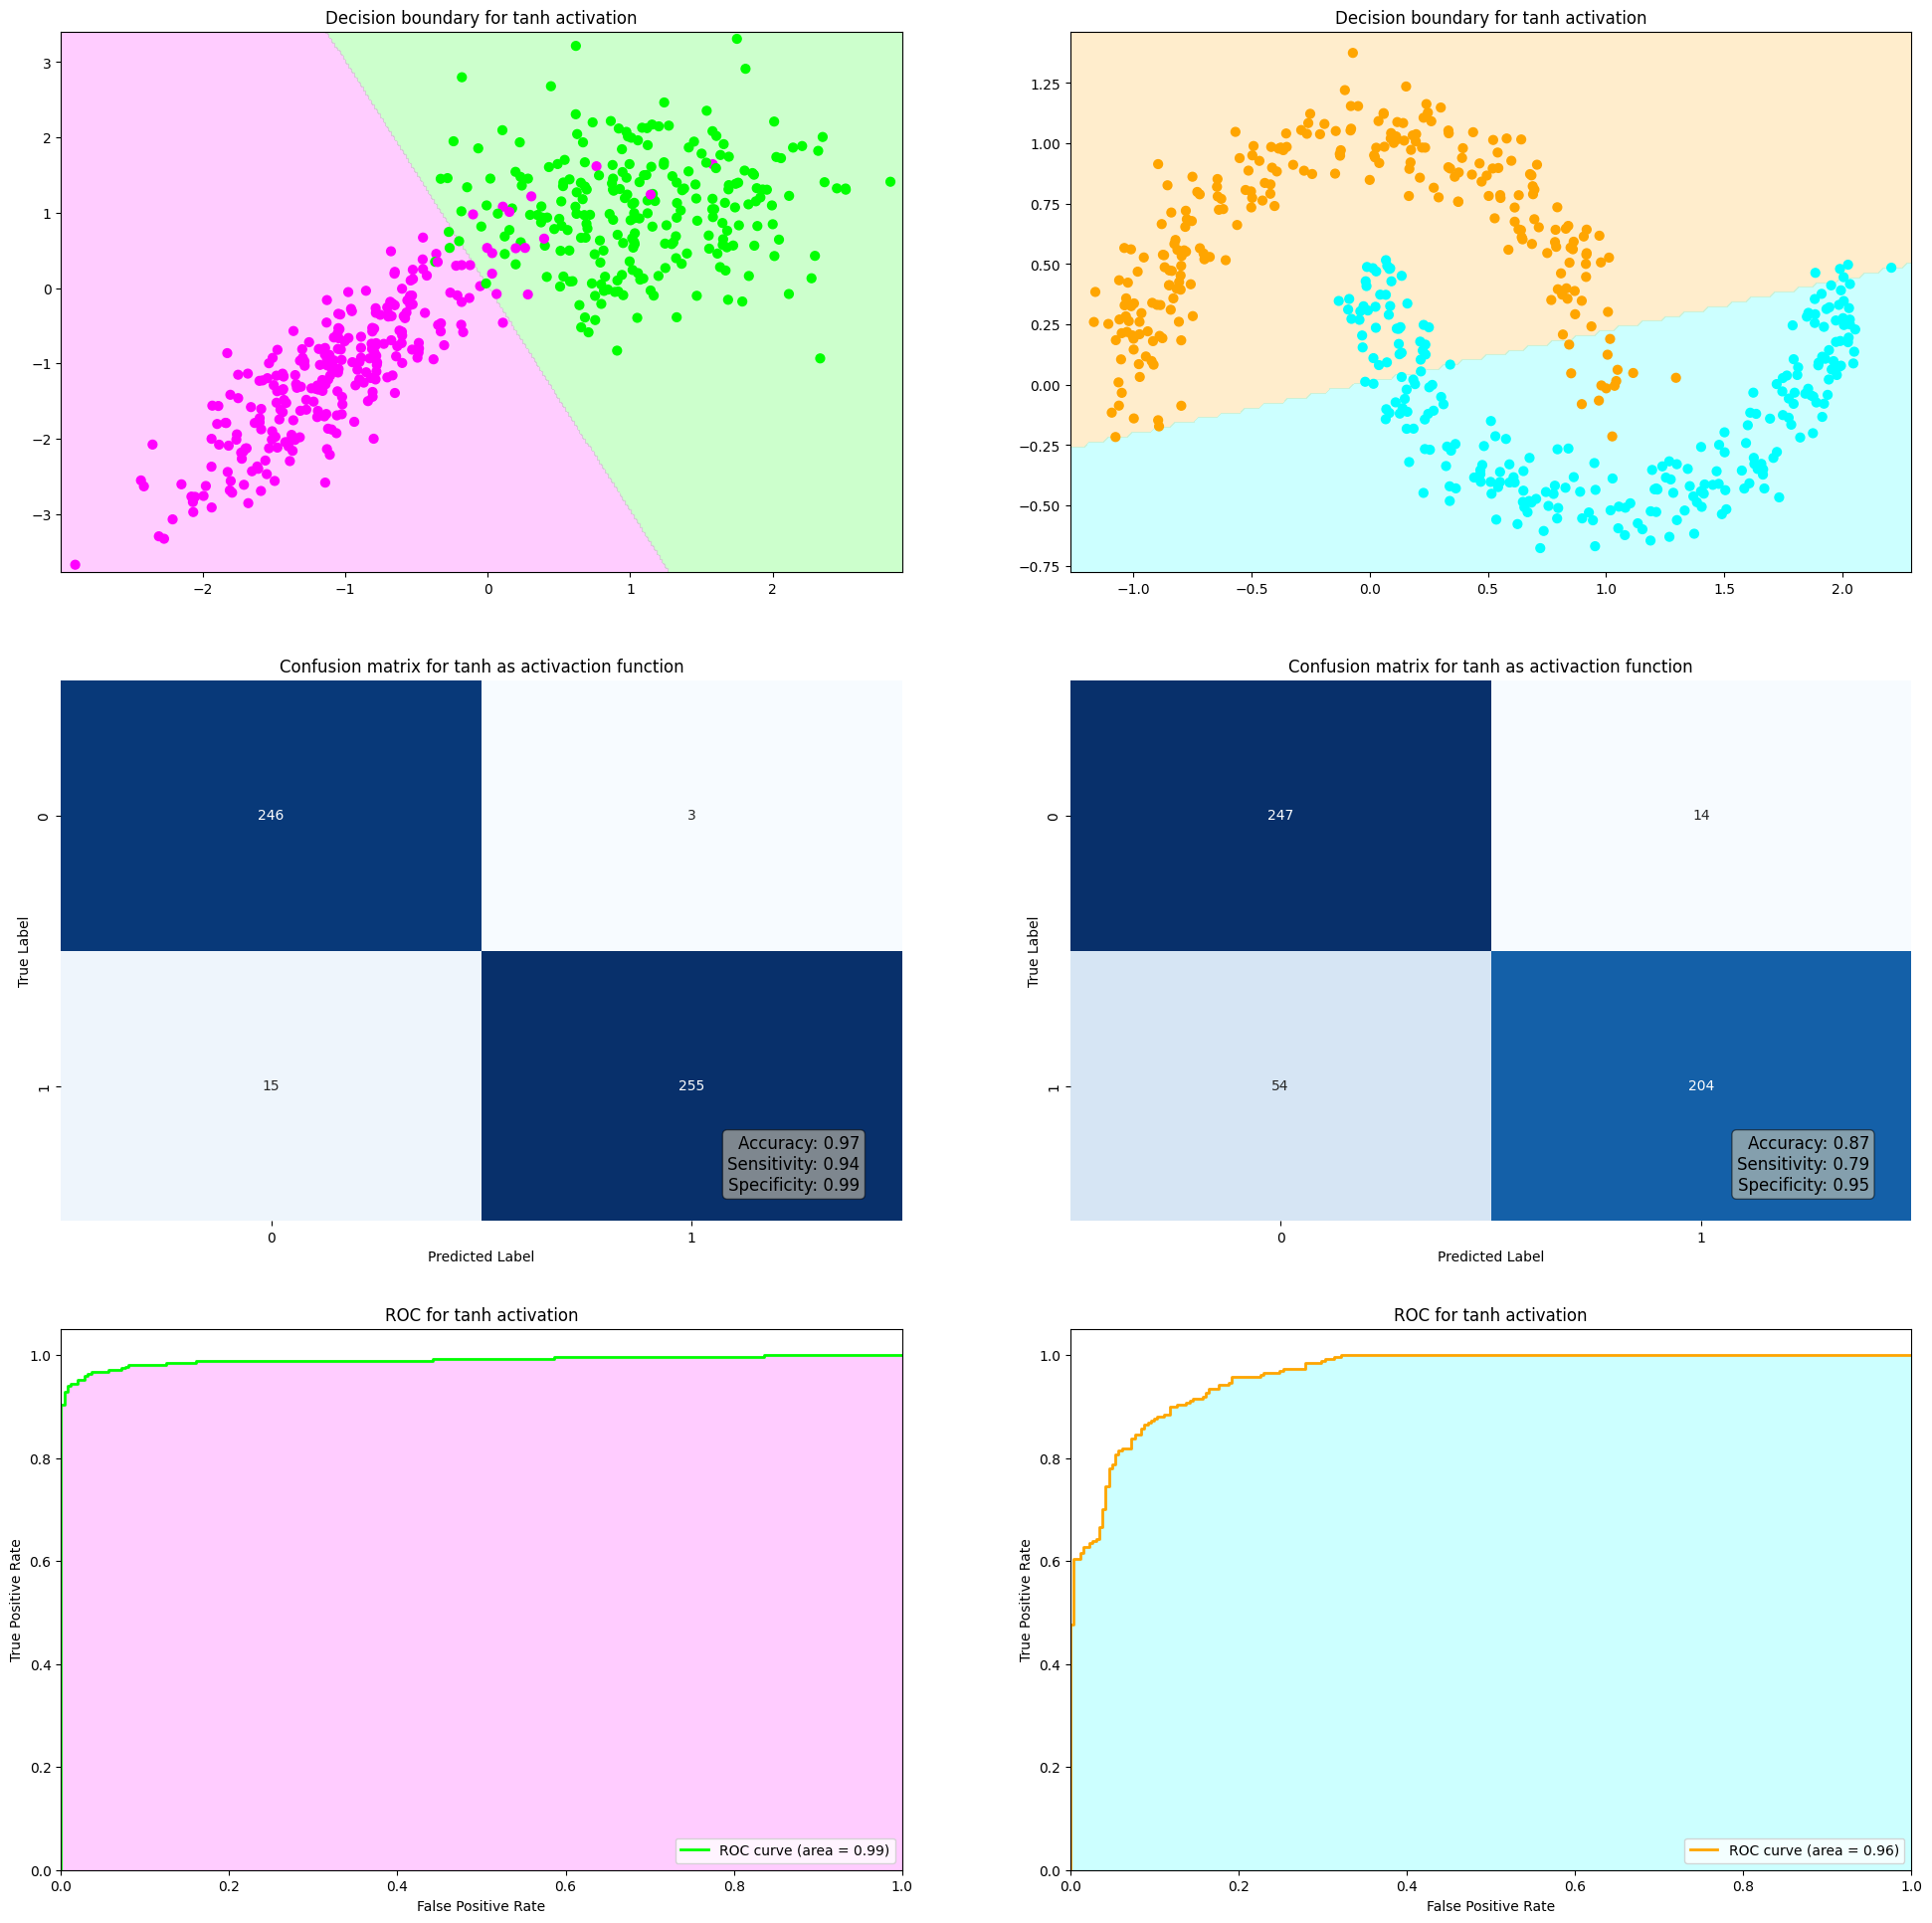

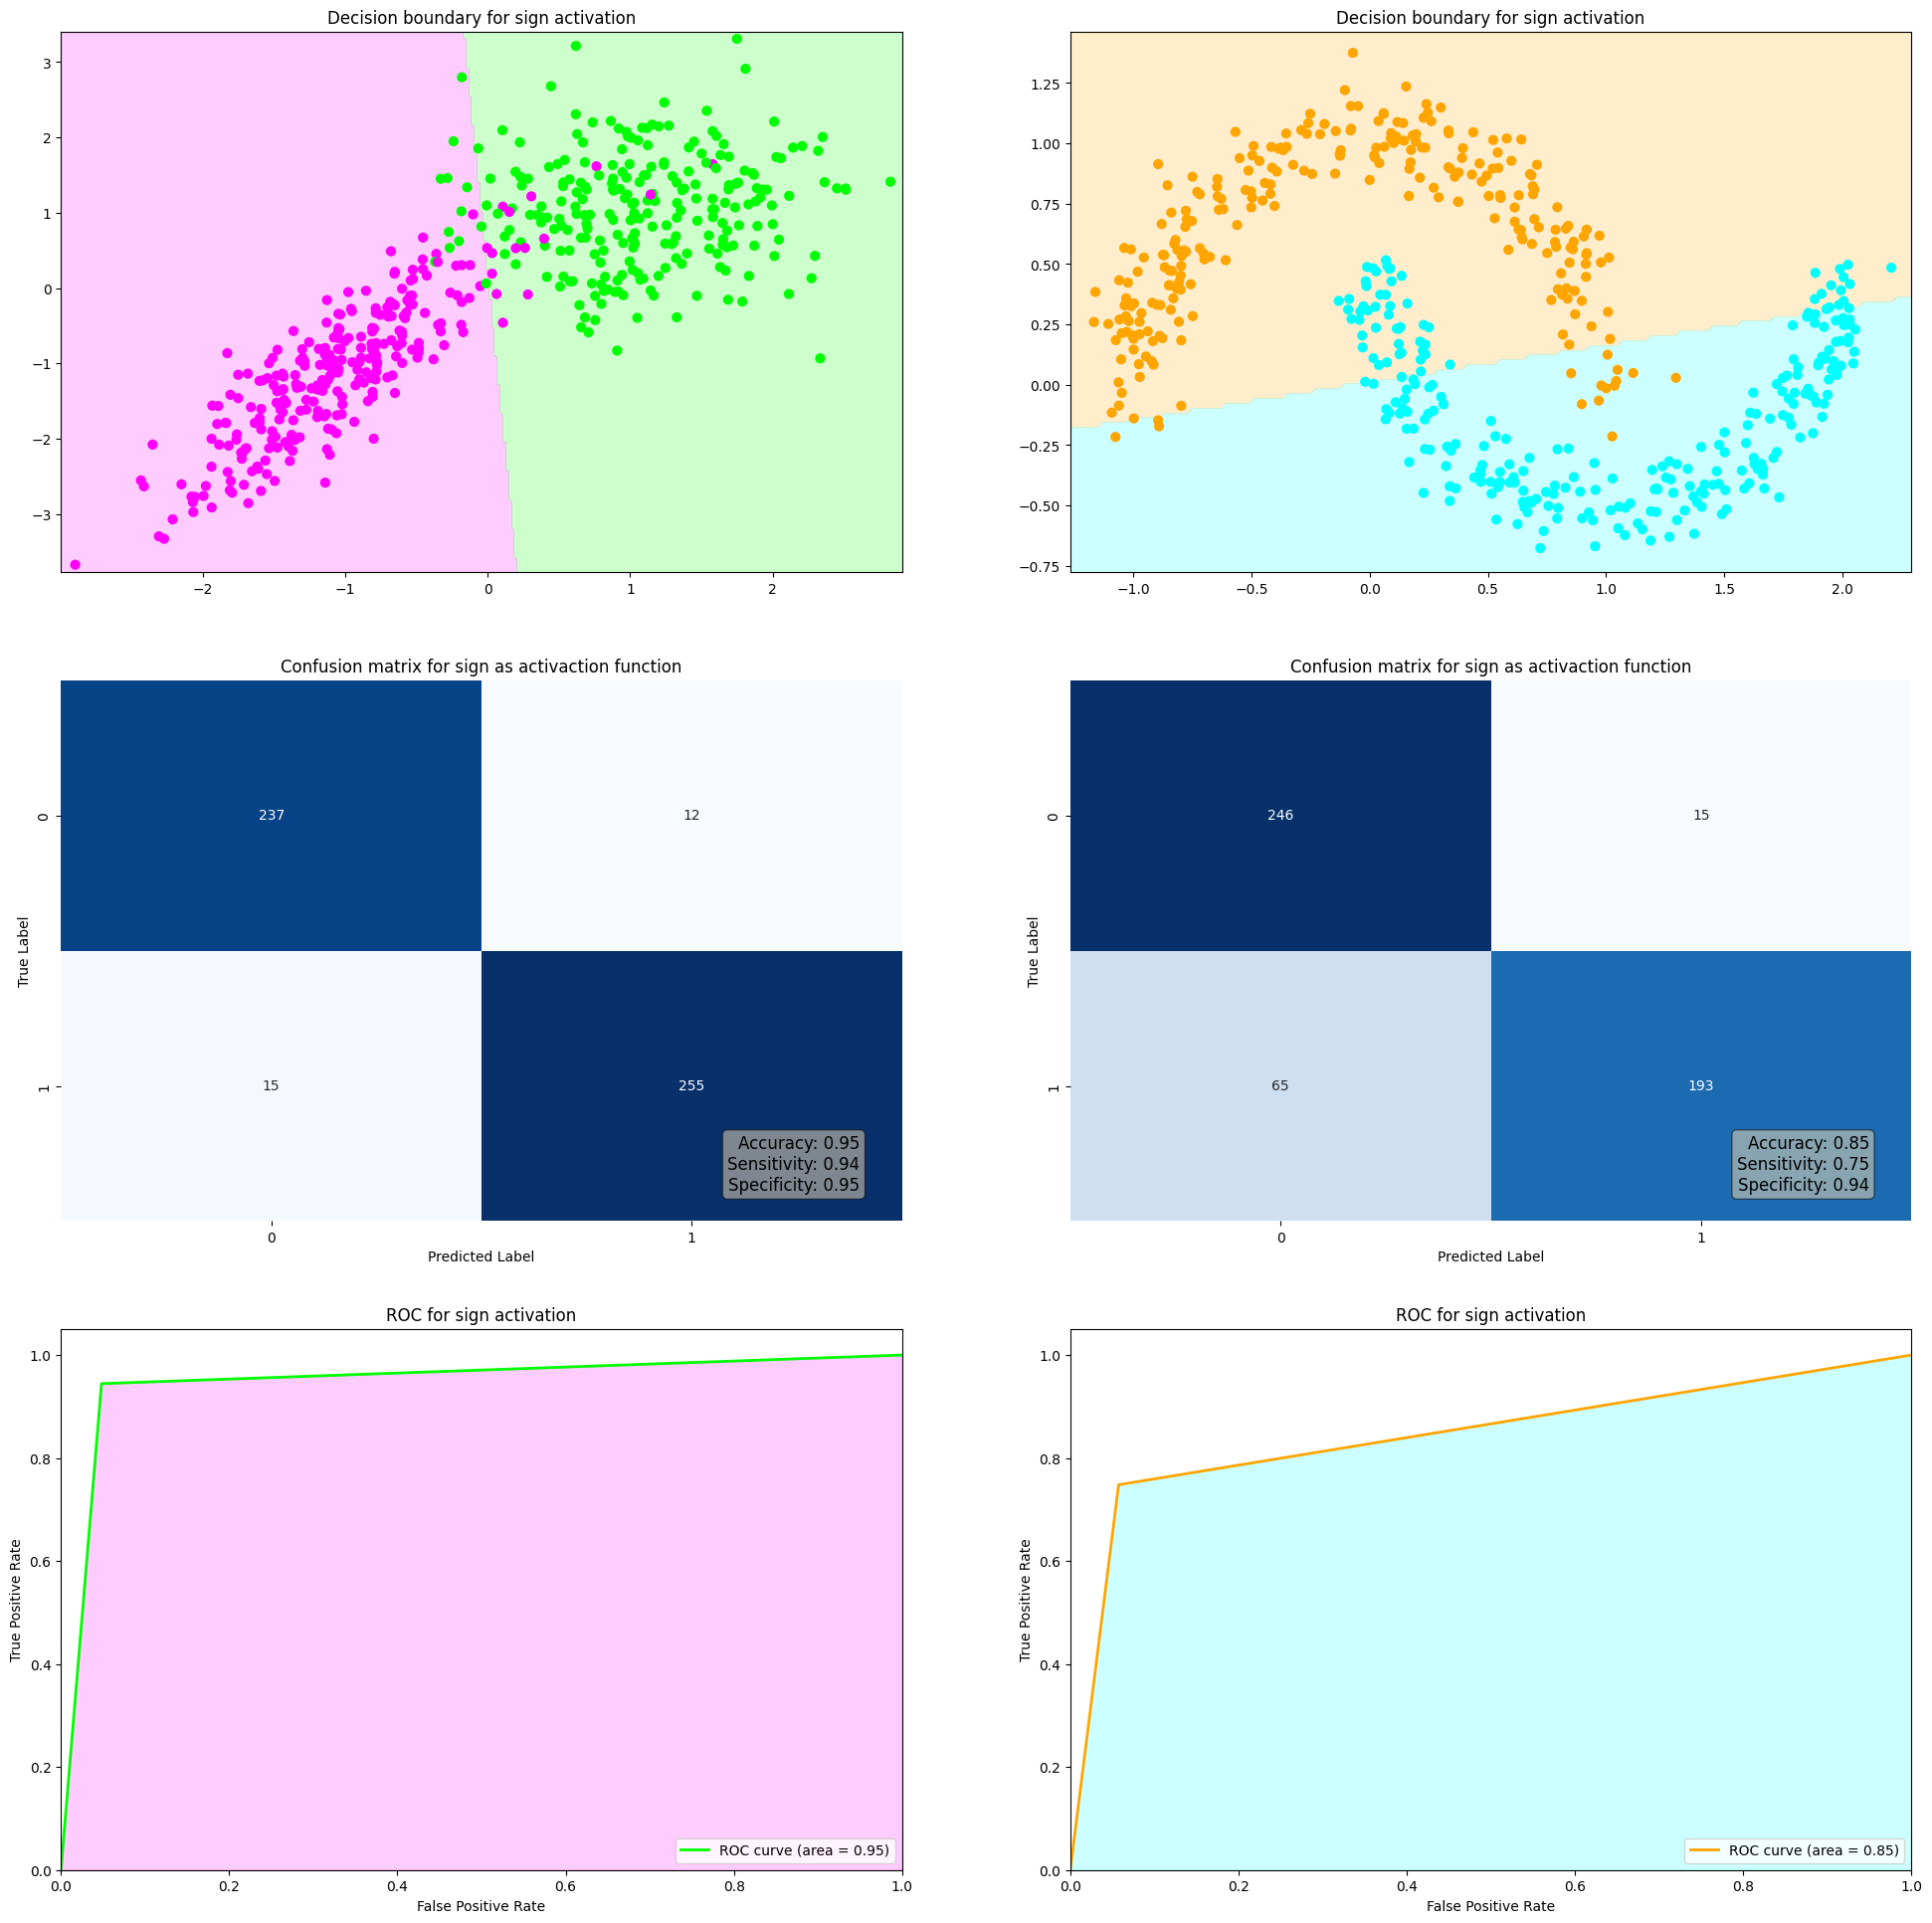

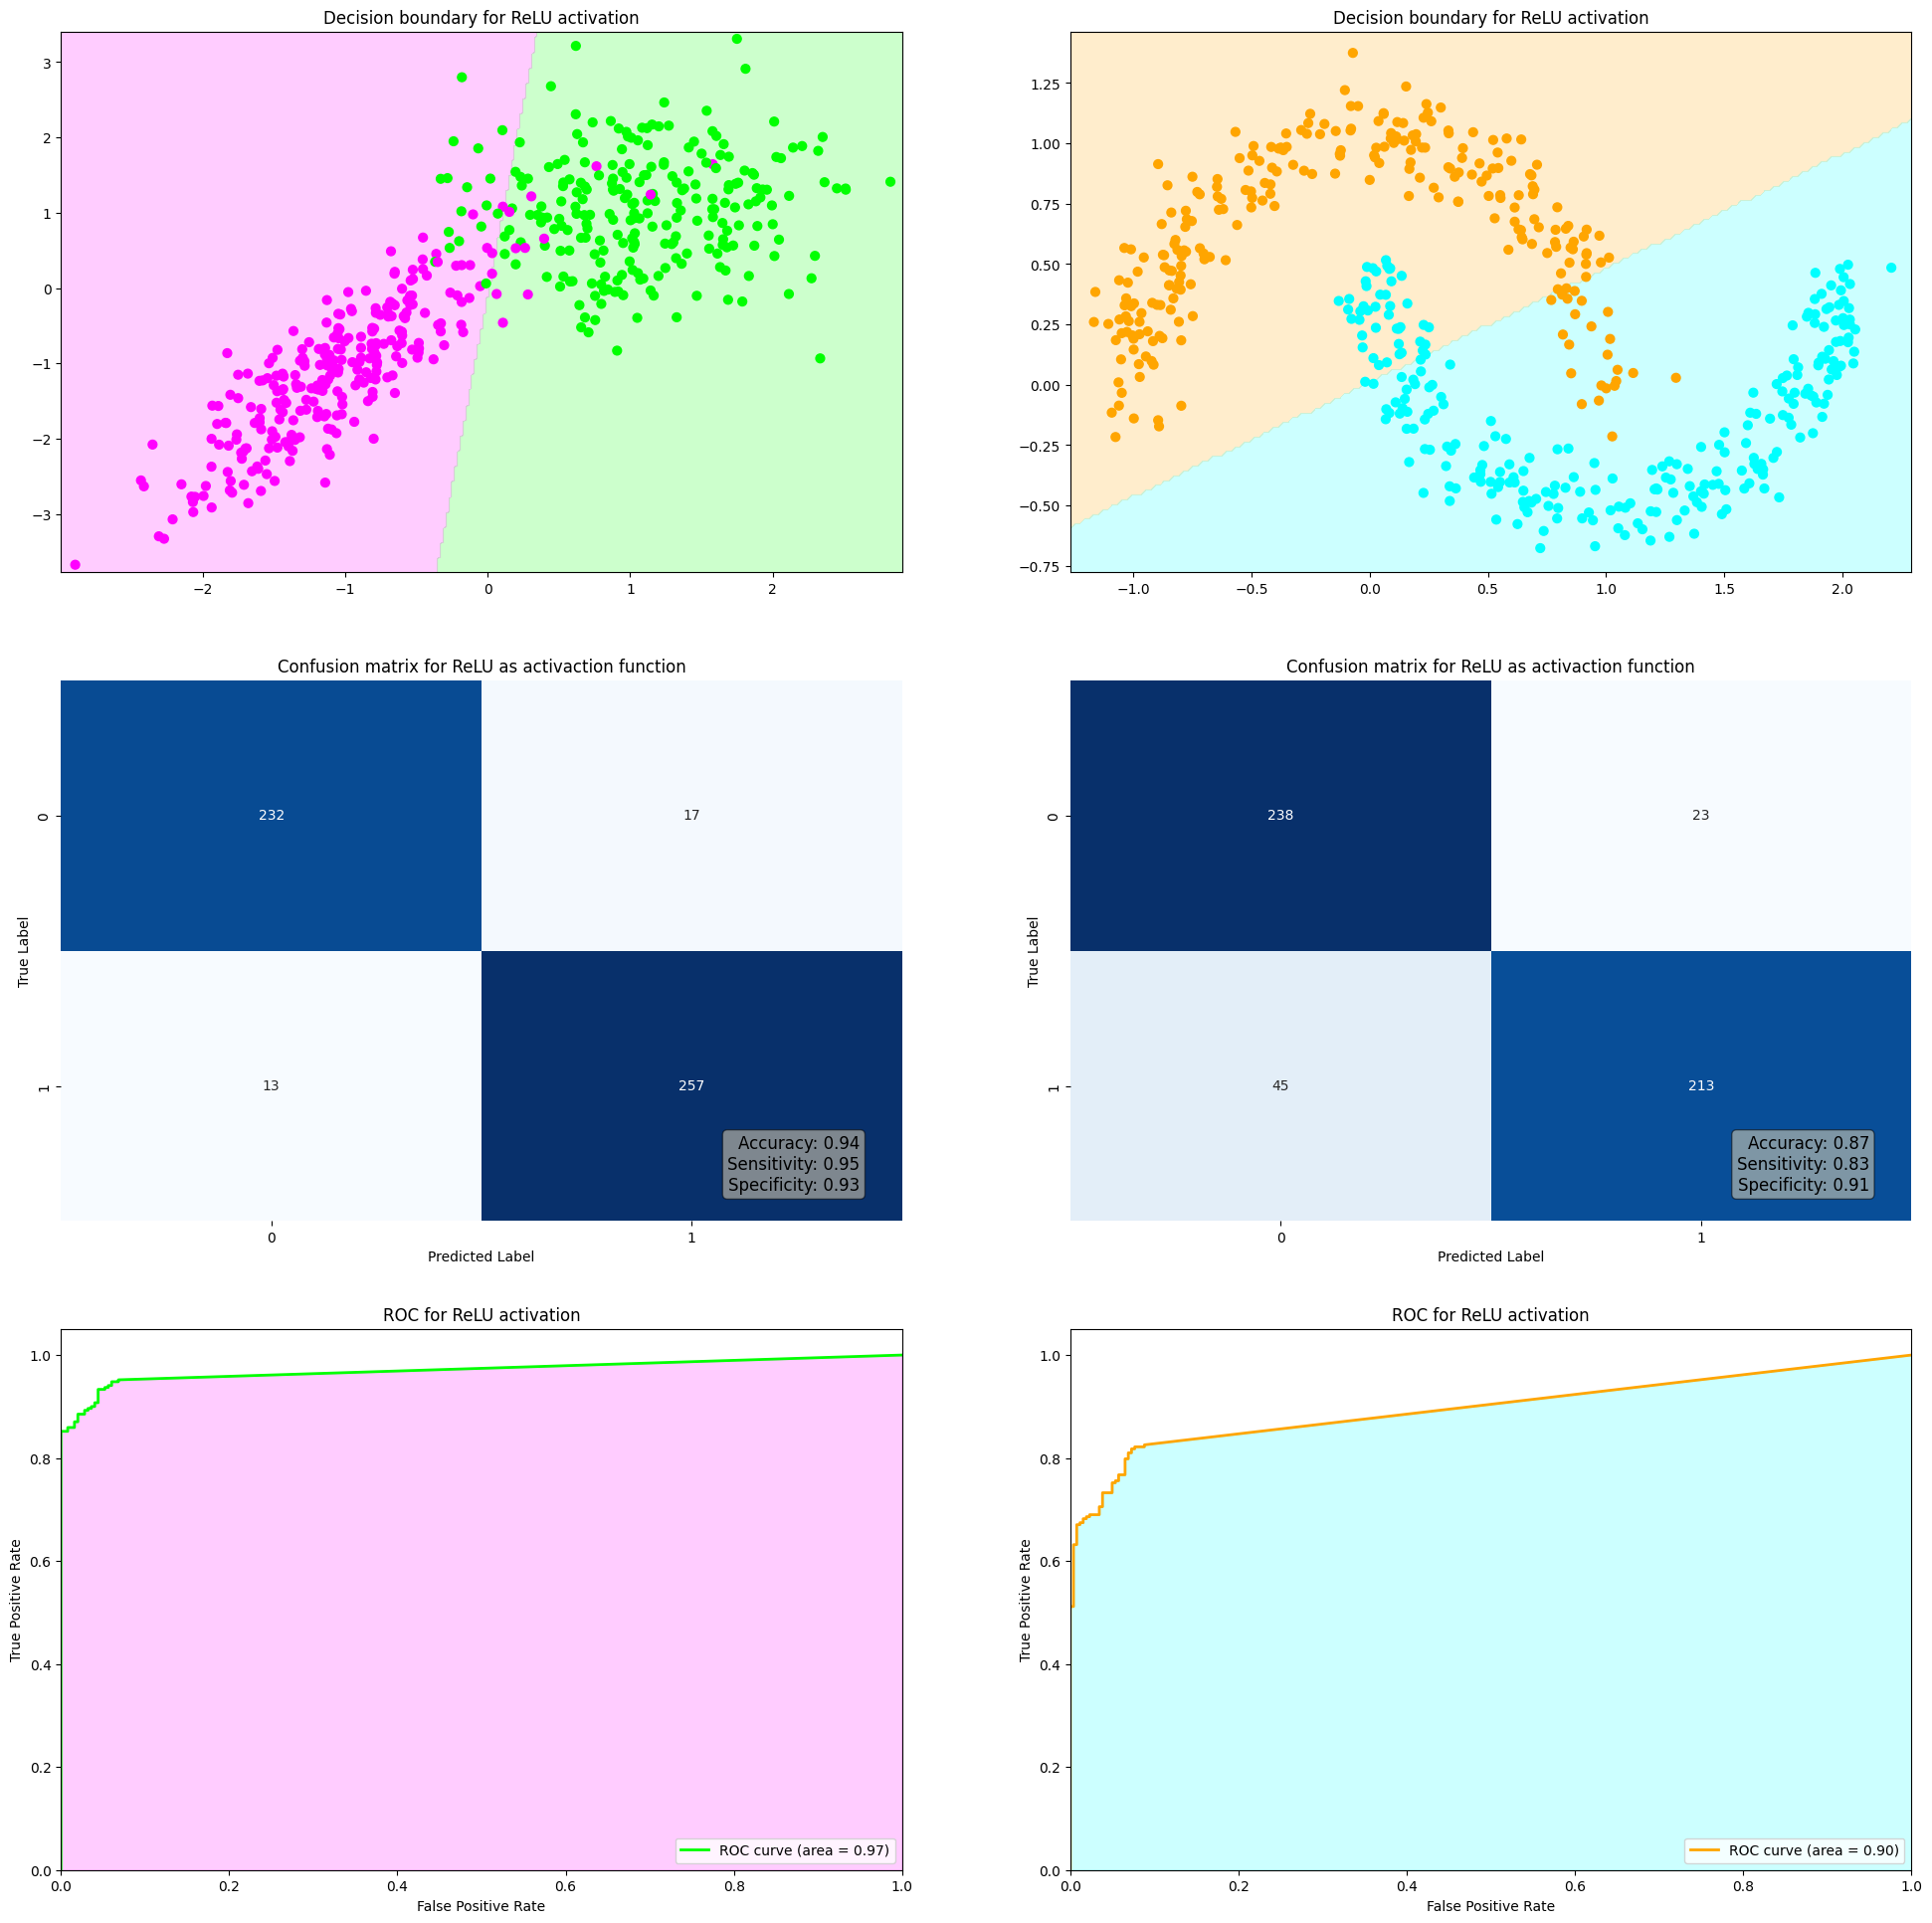

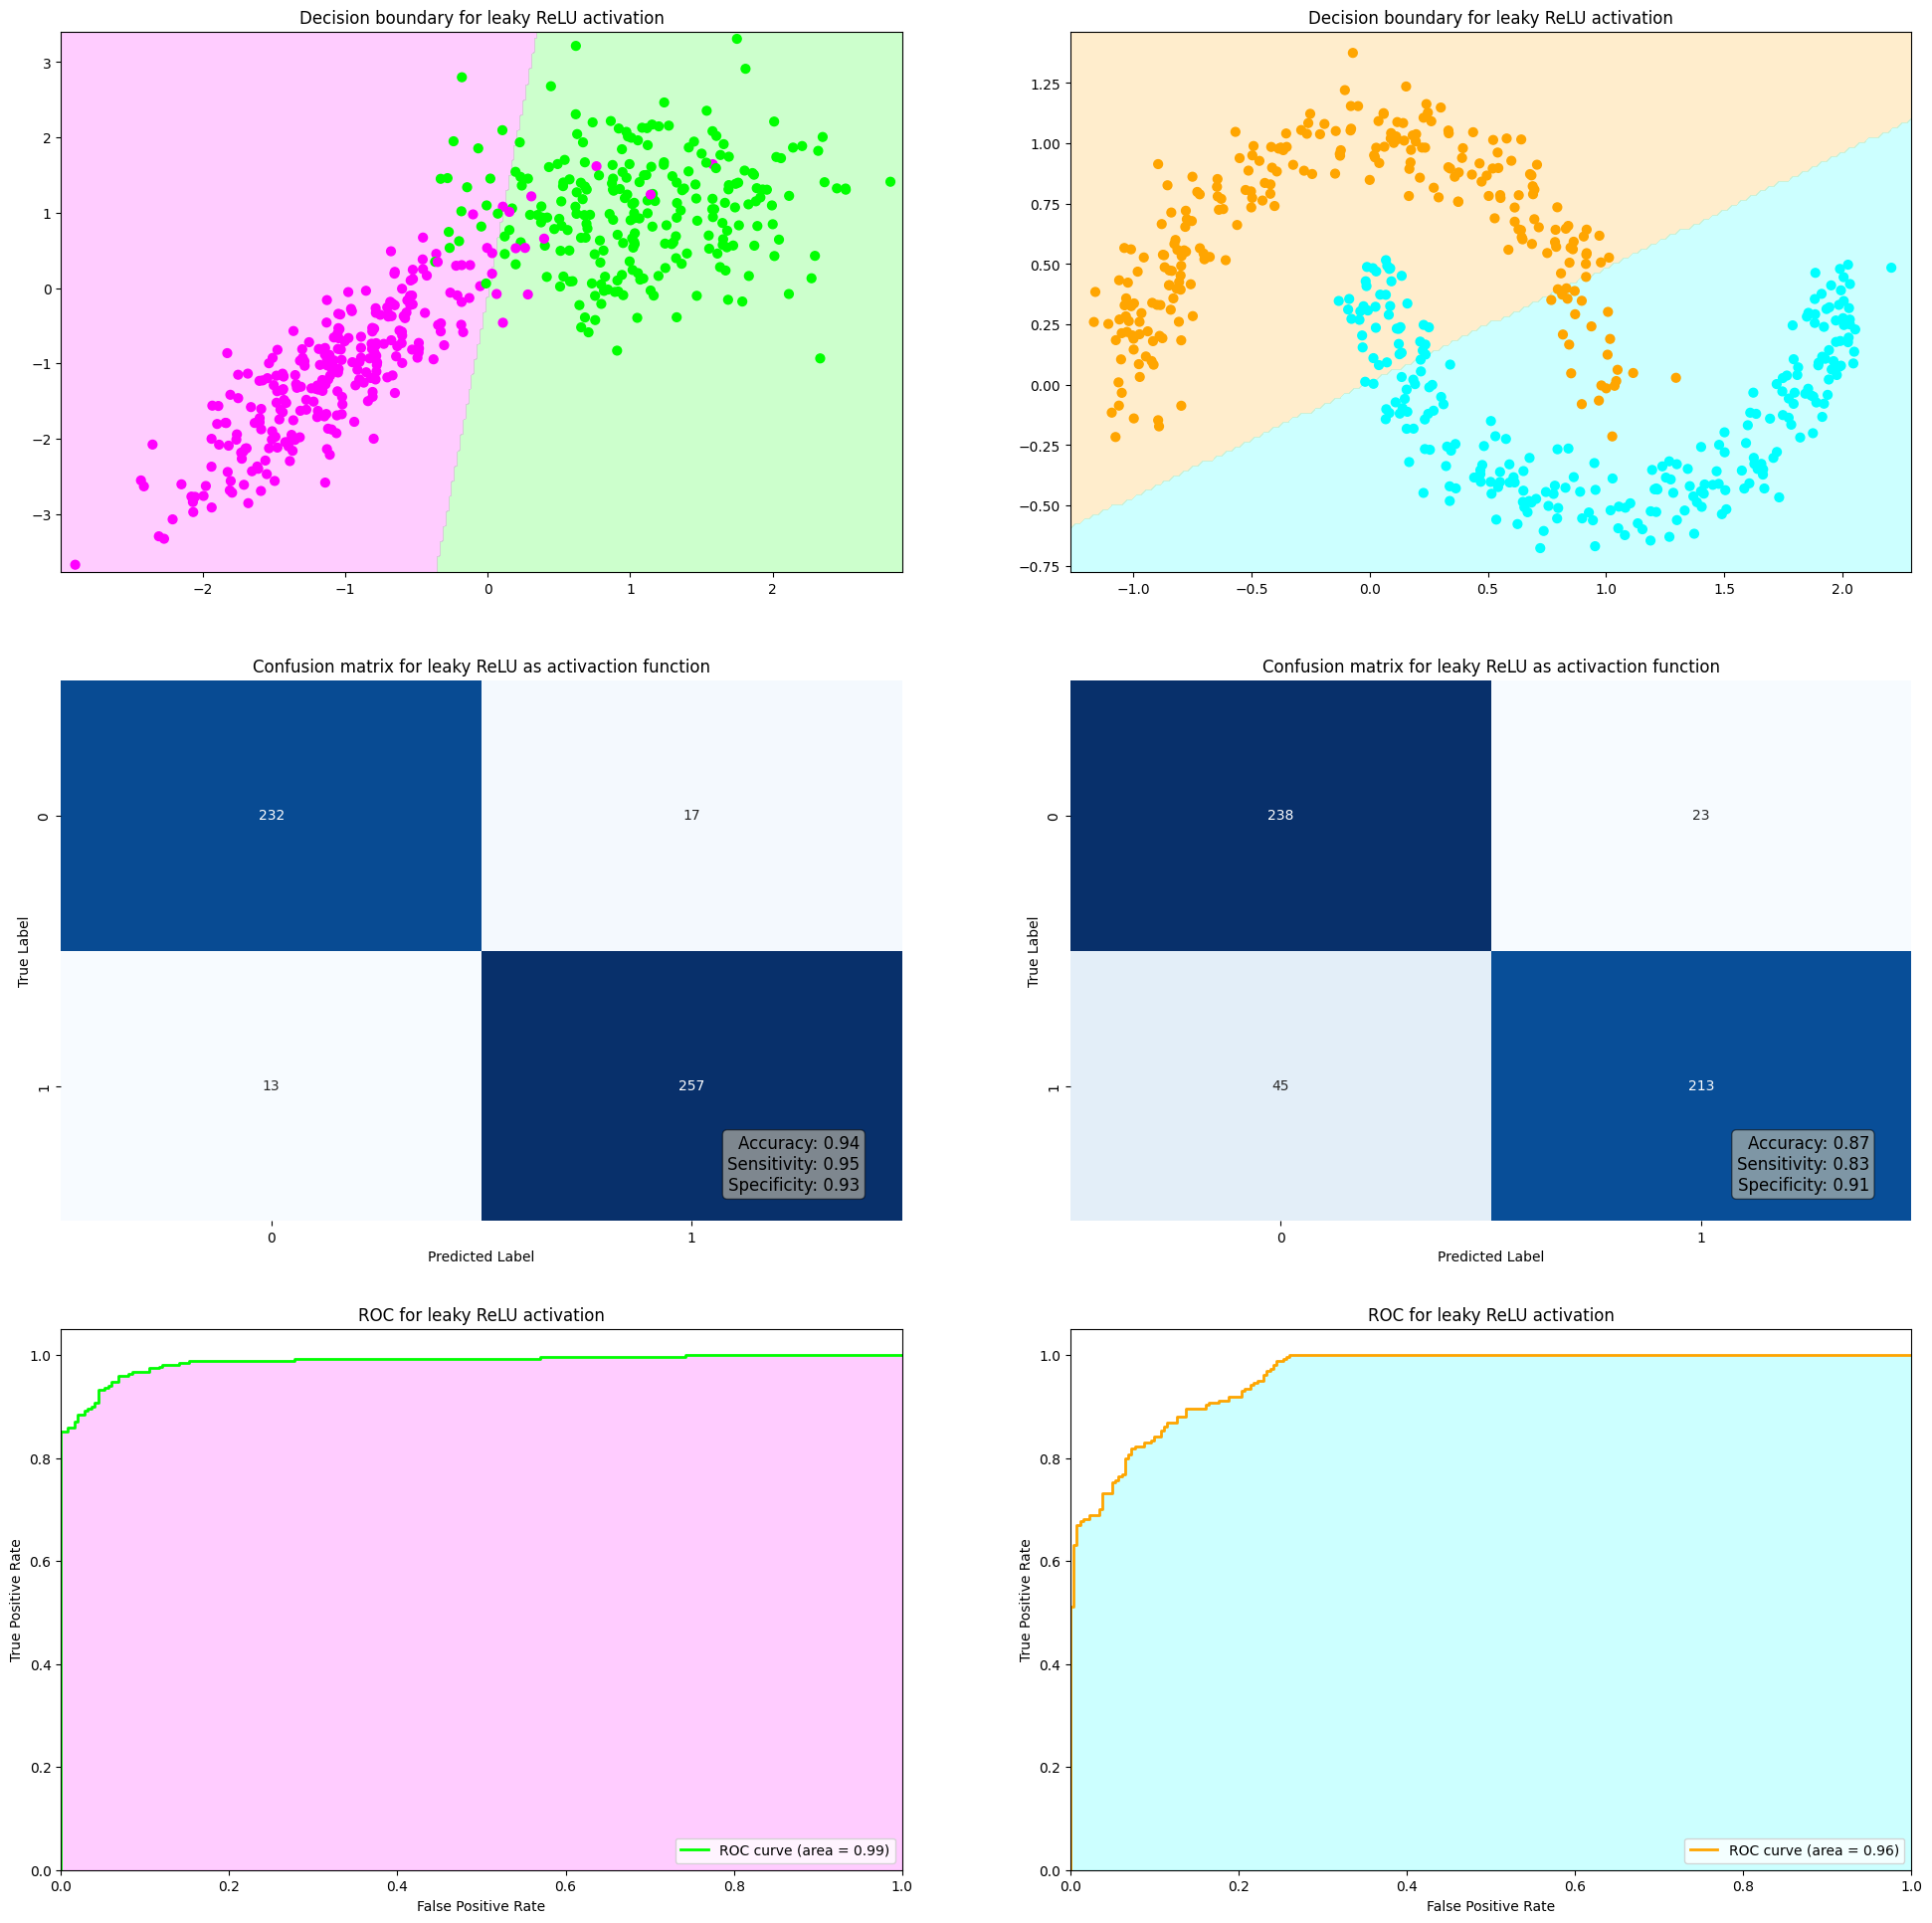

In [784]:
X_tests = [X_test_clf, X_test_moons]
y_tests = [y_test_clf, y_test_moons]

weightss = [[weights_sigmoid_clf, weights_sigmoid_moons],
            [weights_Heviside_clf, weights_Heviside_moons],
            [weights_sin_clf, weights_sin_moons],
            [weights_tanh_clf, weights_tanh_moons],
            [weights_sgn_clf, weights_sgn_moons],
            [weights_relu_clf, weights_relu_moons],
            [weights_leaky_relu_clf, weights_leaky_relu_moons]]

colours = [['lime', 'magenta'], ['orange', 'cyan']]

y_preds = [[y_pred_sigmoid_clf, y_pred_sigmoid_moons],
           [y_pred_Heviside_clf, y_pred_Heviside_moons],
           [y_pred_sin_clf, y_pred_sin_moons],
           [y_pred_tanh_clf, y_pred_tanh_moons],
           [y_pred_sgn_clf, y_pred_sgn_moons],
           [y_pred_relu_clf, y_pred_relu_moons],
           [y_pred_leaky_relu_clf, y_pred_leaky_relu_moons]]

model = ['logistic', 'Heaviside', 'sinus', 'tanh', 'sign', 'ReLU', 'leaky ReLU']

for mod, pred in zip(model, weightss):
    print(mod, ' ---> ', pred)

tresholds = [0.5, 0, 0, 0, 0, 0, 0]

functions = [sigmoid, Heviside, np.sin, np.tanh, sgn, relu, leaky_relu]

for i in range(7):
    fig, axs = plt.subplots(3, 2, figsize=(24, 24))
    plot_summary(axs, X_tests, y_tests, weightss[i], colours, functions[i], y_preds[i], model[i], tresholds[i])
    